# QFN

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
#import seaborn as sns
#import patchworklib as pw
import xlwings as xw
import seaborn as sns 
import numpy as np 
sns.set()
import xlsxwriter
from openpyxl.styles import Font
from openpyxl.chart import BarChart, Reference

In [2]:
base = "C:\\Users\\shweta.sharma\\OneDrive - Analog Devices, Inc\\Desktop"

In [3]:
%pip install --upgrade matplotlib
%pip install --upgrade patchworklib as pw

Note: you may need to restart the kernel to use updated packages.
  Using cached patchworklib-0.5.0-py3-none-any.whl (44 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [4]:
%pip install openpyxl pandas
#pip install patchworklib
#import patchworklib as pw

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: python-dateutil>=2.8.1 in c:\users\shweta.sharma\anaconda3\lib\site-packages (from pandas) (2.8.2)



In [5]:
##import openpyxl
from openpyxl import load_workbook

In [6]:
#### convert excel to dataframe ### step 1
wb1= load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
data1 = pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='QFN Tracker')

data_Qfn1 = data1.iloc[:,0:3] ###############     step 1 qfn 
data_Qfn2= (data1.iloc[:,6:10]).round(0).fillna('0').astype(int)#
data_Qfn3=data1.iloc[:,[-7,-6,-5,-4,-3,-2,-1]].round(0).fillna('0').astype(int)
data_Qfn4 = pd.concat([data_Qfn1,data_Qfn2,data_Qfn3],axis=1)

display(data_Qfn4) #### dataframe 1 ####


,Unnamed: 0,Vendor,Vendor SAP name,Q1 weekly,Q2 weekly.1,Q3 weekly.1,Q4 weekly.1,W48,W49,W50,W51,W52,W01.1,W02.1
0,QFN,ASECL,ASE_CL_TW,11617,11939,13600,12897,14050,12778,10747,12997,12106,0,0
1,QFN,UTL,UTAC_C2_TH,5389,6479,6404,6726,7928,8185,6711,7198,6169,0,0
2,QFN,ATP,AMKR_ML_PH,419,280,303,408,335,225,477,416,322,0,0
3,QFN,JCET,JCET_JY_CN,627,487,377,302,360,0,0,520,173,0,0
4,QFN,UDG,UTAC_DG_CN,1481,801,1191,987,1383,303,463,342,888,0,0
5,QFN,ATC,AMKR_SH_CN,45,7,0,2,0,0,0,5,0,0,0
6,QFN,Proj output (Starts shifted by 2 wks),NaN,19503,19937,21592,18161,23013,20179,17223,23428,18581,23084,16045
7,QFN,Commit,NaN,19450,20300,21390,21488,21488,21488,21488,21488,21488,21488,21488
8,QFN,cuml. delta to Commit,NaN,0,0,0,0,2772,2775,-316,-325,-2156,0,0


In [7]:
### to get the sum of all package type as per W43 2022 ### Step 2 ## for QFN
wb1 = load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
#print(wb)
out1 = pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='Output data')
#sheet = wb['Output data']
Qfd2 = out1.iloc[23:29,[9, -1]]
Qfd2.columns = ['packge group', 'W52'] ##to rename row as column name
#dataframe_3= dataframe2.iloc[3:] 

QFN = Qfd2.reset_index(drop=True)
QFN1=QFN.fillna(0).loc[:,'W52'].div(1000).round(0)


display(QFN1)


0    12106.0
1     6169.0
2      888.0
3      322.0
4      173.0
5        0.0
Name: W52, dtype: float64

In [8]:
wb1= load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
#print(wb)
start1= pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='Starts data')
#print(sheet_1)
qfn_2= start1.iloc[22:28,[0, -1]] WEEK

qfn_3= qfn_2.rename(columns =qfn_2.iloc[0]) ##to rename row as column name

qfn_4 = qfn_3.reset_index(drop=True) ## drop the original index

qfn_4.columns = ['packge group', 'W52']
starts_QFN= qfn_4['W52'].sum()/1000 ### step 3(a) for week 45


print(round(starts_QFN))

display(starts_QFN)

16045


16044.729

In [9]:
qfn_2

,Unnamed: 0,START_FY / START_QTR / START_WK.92
22,QFN,204931
23,QFN,NaN
24,QFN,9636549
25,QFN,17013
26,QFN,6042600
27,QFN,143636


In [10]:


[data_Qfn4.insert(i, '', np.nan, allow_duplicates=True) for i in range(data_Qfn4.shape[1],13 ,-1,)]
[data_Qfn4.insert(i, '', np.nan, allow_duplicates=True) for i in range(data_Qfn4.shape[1],14 ,-2,)]






data_Qfn4.rename(columns={data_Qfn4.columns[-1]: 'W03.1'},inplace=True)

data_Qfn4.iloc[-3, data_Qfn4.columns.get_loc('W03.1')] =starts_QFN 


display(data_Qfn4)




,Unnamed: 0,Vendor,Vendor SAP name,Q1 weekly,Q2 weekly.1,Q3 weekly.1,Q4 weekly.1,W48,W49,W50,W51,W52,W01.1,W02.1,W03.1,W03.1
0,QFN,ASECL,ASE_CL_TW,11617,11939,13600,12897,14050,12778,10747,12997,12106,0,0,NaN,NaN
1,QFN,UTL,UTAC_C2_TH,5389,6479,6404,6726,7928,8185,6711,7198,6169,0,0,NaN,NaN
2,QFN,ATP,AMKR_ML_PH,419,280,303,408,335,225,477,416,322,0,0,NaN,NaN
3,QFN,JCET,JCET_JY_CN,627,487,377,302,360,0,0,520,173,0,0,NaN,NaN
4,QFN,UDG,UTAC_DG_CN,1481,801,1191,987,1383,303,463,342,888,0,0,NaN,NaN
5,QFN,ATC,AMKR_SH_CN,45,7,0,2,0,0,0,5,0,0,0,NaN,NaN
6,QFN,Proj output (Starts shifted by 2 wks),NaN,19503,19937,21592,18161,23013,20179,17223,23428,18581,23084,16045,16044.729,16044.729
7,QFN,Commit,NaN,19450,20300,21390,21488,21488,21488,21488,21488,21488,21488,21488,NaN,NaN
8,QFN,cuml. delta to Commit,NaN,0,0,0,0,2772,2775,-316,-325,-2156,0,0,NaN,NaN


# FLIPCHIP

In [11]:
#### convert excel to dataframe ### step 1
wb1= load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
data2 = pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='FLIPCHIP Tracker')

data_flipch1 = data2.iloc[:,0:3] ###############     step 1 qfn 
data_flipch2= (data2.iloc[:,6:10]).round(0).fillna('0').astype(int)####from column 5 to 8
data_flipch3=data2.iloc[:,[-7,-6,-5,-4,-3,-2,-1]].round(0).fillna('0').astype(int) ###for last 3 column
data_flipch4 = pd.concat([data_flipch1,data_flipch2,data_flipch3],axis=1)
#[data_Qfn


display(data_flipch4) #### dataframe 1 ####
#type(data3)

,Unnamed: 0,Vendor,Vendor SAP name,Q1 weekly,Q2 weekly.1,Q3 weekly.1,Q4 weekly.1,W48,W49,W50,W51,W52,W01.1,W02.1
0,FLIPCHIP,ASEK,ASE_KA_TW,502,579,565,676,951,699,263,502,290,0,0
1,FLIPCHIP,ATC,AMKR_SH_CN,459,242,59,173,0,0,403,42,0,0,0
2,FLIPCHIP,Proj output (Starts shifted by 2 wks),NaN,705,797,606,701,747,861,567,1187,270,392,478
3,FLIPCHIP,Commit,NaN,635,710,680,718,739,739,739,739,739,739,739
4,FLIPCHIP,cuml. delta to Commit,NaN,0,0,0,0,2504,2464,2391,2196,1747,0,0


In [12]:
### to get the sum of all package type as per W43 2022 ### Step 2 ## for QFN
wb1 = load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
#print(wb)
out2 = pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='Output data')
#sheet = wb['Output data']
Flip = out2.iloc[6:8,[9, -1]]
Flip.columns = ['packge group', 'W52'] 
#dataframe_3= dataframe2.iloc[3:] 

Flipchip = Flip.reset_index(drop=True)
flip1=Flipchip.fillna(0).loc[:,'W52'].div(1000).round(0)


In [13]:
display(flip1)

0    290.0
1      0.0
Name: W52, dtype: float64

In [14]:
wb1= load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
#print(wb)
start2= pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='Starts data')
#print(sheet_1)
flipch= start2.iloc[4:6,[9,-1]] 
flipch1= flipch.rename(columns =flipch.iloc[0]) 
#print('new_dataframe : ')

flipch2 = flipch1.reset_index(drop=True) 

flipch2.columns = ['Vendor', 'W52']
starts_flip= flipch2['W52'].sum()/1000 


In [15]:

print(round(starts_flip))

478


In [17]:
[data_flipch4.insert(i, '', np.nan, allow_duplicates=True) for i in range(data_flipch4.shape[1],13 ,-1,)]
[data_flipch4.insert(i, '', np.nan, allow_duplicates=True) for i in range(data_flipch4.shape[1],14 ,-2,)]


[None]

In [18]:
data_flipch4.rename(columns={data_flipch4.columns[-1]: 'W03.1'},inplace=True)


In [19]:
display(data_flipch4)

,Unnamed: 0,Vendor,Vendor SAP name,Q1 weekly,Q2 weekly.1,Q3 weekly.1,Q4 weekly.1,W48,W49,W50,W51,W52,W01.1,W02.1,W03.1,W03.1
0,FLIPCHIP,ASEK,ASE_KA_TW,502,579,565,676,951,699,263,502,290,0,0,NaN,NaN
1,FLIPCHIP,ATC,AMKR_SH_CN,459,242,59,173,0,0,403,42,0,0,0,NaN,NaN
2,FLIPCHIP,Proj output (Starts shifted by 2 wks),NaN,705,797,606,701,747,861,567,1187,270,392,478,NaN,NaN
3,FLIPCHIP,Commit,NaN,635,710,680,718,739,739,739,739,739,739,739,NaN,NaN
4,FLIPCHIP,cuml. delta to Commit,NaN,0,0,0,0,2504,2464,2391,2196,1747,0,0,NaN,NaN


In [21]:
data_flipch4.iloc[-3, data_flipch4.columns.get_loc('W03.1')] =starts_flip ## To add data to particulat row

In [22]:
display(data_flipch4)

,Unnamed: 0,Vendor,Vendor SAP name,Q1 weekly,Q2 weekly.1,Q3 weekly.1,Q4 weekly.1,W48,W49,W50,W51,W52,W01.1,W02.1,W03.1,W03.1
0,FLIPCHIP,ASEK,ASE_KA_TW,502,579,565,676,951,699,263,502,290,0,0,NaN,NaN
1,FLIPCHIP,ATC,AMKR_SH_CN,459,242,59,173,0,0,403,42,0,0,0,NaN,NaN
2,FLIPCHIP,Proj output (Starts shifted by 2 wks),NaN,705,797,606,701,747,861,567,1187,270,392,478,477.511,477.511
3,FLIPCHIP,Commit,NaN,635,710,680,718,739,739,739,739,739,739,739,NaN,NaN
4,FLIPCHIP,cuml. delta to Commit,NaN,0,0,0,0,2504,2464,2391,2196,1747,0,0,NaN,NaN


In [25]:
QfNtt=data_flipch4.T    ######## for graph new data###
QfNtt.reset_index(inplace=True)
QFttT=QfNtt.rename(columns =QfNtt.iloc[1])
QFTT1=QFttT.iloc[3: , :]

QFTT1.reset_index(inplace=True,drop=True)
QFTT1=QFTT1.set_index('Vendor').iloc[:-1,:].round(0)








display(QFTT1)


,ASEK,ATC,Proj output (Starts shifted by 2 wks),Commit,cuml. delta to Commit
Vendor,,,,,
Q1 weekly,502,459,705,635,0
Q2 weekly.1,579,242,797,710,0
Q3 weekly.1,565,59,606,680,0
Q4 weekly.1,676,173,701,718,0
W48,951,0,747,739,2504
W49,699,0,861,739,2464
W50,263,403,567,739,2391
W51,502,42,1187,739,2196
W52,290,0,270,739,1747


In [26]:
display(QFTT1)

,ASEK,ATC,Proj output (Starts shifted by 2 wks),Commit,cuml. delta to Commit
Vendor,,,,,
Q1 weekly,502,459,705,635,0
Q2 weekly.1,579,242,797,710,0
Q3 weekly.1,565,59,606,680,0
Q4 weekly.1,676,173,701,718,0
W48,951,0,747,739,2504
W49,699,0,861,739,2464
W50,263,403,567,739,2391
W51,502,42,1187,739,2196
W52,290,0,270,739,1747


<AxesSubplot:xlabel='Vendor'>

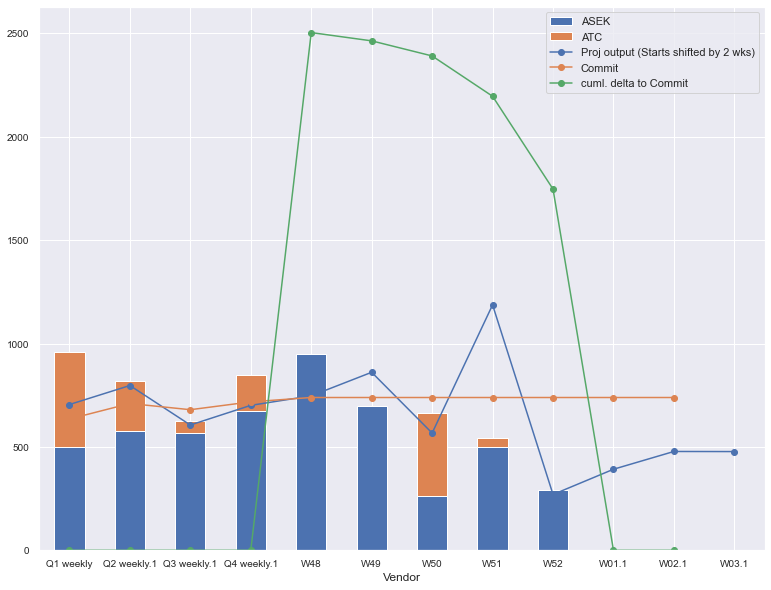

In [27]:
mx = QFTT1.iloc[:,0:-3].plot(kind='bar',stacked='True',figsize = (13,10),fontsize=10)
QFTT1.iloc[:,[-3,-2,-1]].plot(linestyle='-', marker='o', ax = mx,figsize = (13,10),fontsize=10)


# LGA


In [28]:
#### convert excel to dataframe ### step 1
wb1= load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
data3 = pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='LGA Tracker')

data_lga1 = data3.iloc[:,0:3] ###############     s
data_lga2= (data3.iloc[:,6:10]).round(0).fillna('0').astype(int)
data_lga3=data3.iloc[:,[-7,-6,-5,-4,-3,-2,-1]].round(0).fillna('0').astype(int) 
data_lga4 = pd.concat([data_lga1,data_lga2,data_lga3],axis=1)
#[data_Qfn


display(data_lga4) 

,Unnamed: 0,Vendor,Vendor SAP name,Q1 weekly,Q2 weekly.1,Q3 weekly.1,Q4 weekly.1,W48,W49,W50,W51,W52,W01.1,W02.1
0,LGA,UTL,UTAC_C2_TH,1150,611,1009,1319,1202,1119,1838,1282,1920,0,0
1,LGA,ASECL,ASE_CL_TW,643,902,721,453,532,579,15,382,13,0,0
2,LGA,Proj output (Starts shifted by 2 wks),NaN,1880,1565,1704,1505,520,1944,2469,1424,1675,1290,413
3,LGA,Commit,NaN,2250,1550,2250,1649,1649,1649,1649,1649,1650,1650,1650
4,LGA,cuml. delta to Commit,NaN,0,0,0,0,1052,1101,1305,1319,1603,0,0


In [29]:
### to get the sum of all package type as per W43 2022 ### Step 2 ## for QFN
wb1 = load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
#print(wb)
output3 = pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='Output data')
#sheet = wb['Output data']
lga = output3.iloc[8:10,[9, -1]
lga.columns = ['packge group', 'W52'] 
#dataframe_3= dataframe2.iloc[3:] 

lga1 = lga.reset_index(drop=True)
lga2=lga1.fillna(0).loc[:,'W52'].div(1000).round(0)


display(lga2)

0    1920.0
1      13.0
Name: W52, dtype: float64

In [30]:
wb1= load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
#print(wb)
start3= pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='Starts data')
#print(sheet_1)
lg= start3.iloc[6:8,[9,-1]]
#n = 2
#sheet_3= sheet_2.iloc[n:]  
#display(sheet_5)
lg1= lg.rename(columns =lg.iloc[0])
#print('new_dataframe : ')

lg2 = lg1.reset_index(drop=True) 

lg2.columns = ['Vendor', 'W52']
starts_lg3= lg2['W52'].sum()/1000 

print(round(starts_lg3))

413


,Unnamed: 0,Vendor,Vendor SAP name,Q1 weekly,Q2 weekly.1,Q3 weekly.1,Q4 weekly.1,W48,W49,W50,W51,W52,W01.1,W02.1,W03.1,W03.1
0,LGA,UTL,UTAC_C2_TH,1150,611,1009,1319,1202,1119,1838,1282,1920,0,0,NaN,NaN
1,LGA,ASECL,ASE_CL_TW,643,902,721,453,532,579,15,382,13,0,0,NaN,NaN
2,LGA,Proj output (Starts shifted by 2 wks),NaN,1880,1565,1704,1505,520,1944,2469,1424,1675,1290,413,NaN,NaN
3,LGA,Commit,NaN,2250,1550,2250,1649,1649,1649,1649,1649,1650,1650,1650,NaN,NaN
4,LGA,cuml. delta to Commit,NaN,0,0,0,0,1052,1101,1305,1319,1603,0,0,NaN,NaN


,Unnamed: 0,Vendor,Vendor SAP name,Q1 weekly,Q2 weekly.1,Q3 weekly.1,Q4 weekly.1,W48,W49,W50,W51,W52,W01.1,W02.1,W03.1,W03.1
0,LGA,UTL,UTAC_C2_TH,1150,611,1009,1319,1202,1119,1838,1282,1920,0,0,NaN,NaN
1,LGA,ASECL,ASE_CL_TW,643,902,721,453,532,579,15,382,13,0,0,NaN,NaN
2,LGA,Proj output (Starts shifted by 2 wks),NaN,1880,1565,1704,1505,520,1944,2469,1424,1675,1290,413,413.003,413.003
3,LGA,Commit,NaN,2250,1550,2250,1649,1649,1649,1649,1649,1650,1650,1650,NaN,NaN
4,LGA,cuml. delta to Commit,NaN,0,0,0,0,1052,1101,1305,1319,1603,0,0,NaN,NaN


,UTL,ASECL,Proj output (Starts shifted by 2 wks),Commit,cuml. delta to Commit
Vendor,,,,,
Q1 weekly,1150,643,1880,2250,0
Q2 weekly.1,611,902,1565,1550,0
Q3 weekly.1,1009,721,1704,2250,0
Q4 weekly.1,1319,453,1505,1649,0
W48,1202,532,520,1649,1052
W49,1119,579,1944,1649,1101
W50,1838,15,2469,1649,1305
W51,1282,382,1424,1649,1319
W52,1920,13,1675,1650,1603


<AxesSubplot:xlabel='Vendor'>

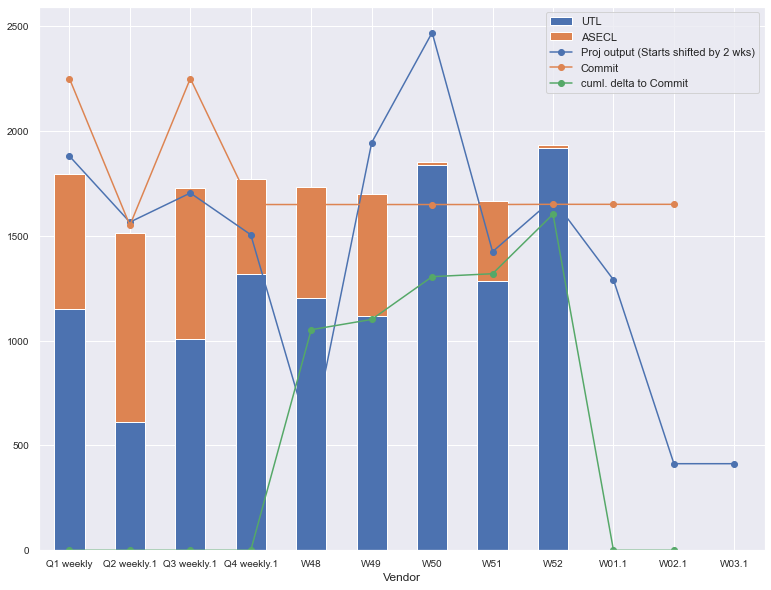

In [31]:

[data_lga4.insert(i, '', np.nan, allow_duplicates=True) for i in range(data_lga4.shape[1],13 ,-1,)]
[data_lga4.insert(i, '', np.nan, allow_duplicates=True) for i in range(data_lga4.shape[1],14 ,-2,)]


data_lga4.rename(columns={data_lga4.columns[-1]: 'W03.1'},inplace=True)

display(data_lga4)

 
data_lga4.iloc[-3, data_lga4.columns.get_loc('W03.1')] =starts_lg3 
display(data_lga4)



lgatt=data_lga4.T    
lgatt.reset_index(inplace=True)
lgttT=lgatt.rename(columns =lgatt.iloc[1])
lgTT1=lgttT.iloc[3: , :]

lgTT1.reset_index(inplace=True,drop=True)
lgTT1=lgTT1.set_index('Vendor').iloc[:-1,:].round(0)

#QFTT1.iloc[:,:-1]






display(lgTT1)



ax = lgTT1.iloc[:,0:-3].plot(kind='bar',stacked='True',figsize = (13,10),fontsize=10)
lgTT1.iloc[:,[-3,-2,-1]].plot(linestyle='-', marker='o', ax = ax,figsize = (13,10),fontsize=10)


#Dl_d.to_excel('output&strt_tracker_QFN_Nw_file.xlsx')





# MSOP

In [38]:
#### convert excel to dataframe ### step 1
wb1= load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
data4 = pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='MSOP Tracker')

data_msp1 = data4.iloc[:,0:3] ###############     step 1 qfn 
data_msp2= (data4.iloc[:,6:10]).round(0).fillna('0').astype(int)####from column 5 to 8
data_msp3=data4.iloc[:,[-7,-6,-5,-4,-3,-2,-1]].round(0).fillna('0').astype(int) ###for last 3 column
data_msp4 = pd.concat([data_msp1,data_msp2,data_msp3],axis=1)
#[data_Qfn

#str_3q.rename(columns={str_3q.columns[-1]: '2022_W1'},inplace=True)
#display(data_soic4)######
display(data_msp4) 

,Unnamed: 0,Vendor,Vendor SAP name,Q1 weekly,Q2 weekly.1,Q3 weekly.1,Q4 weekly.1,W48,W49,W50,W51,W52,W01.1,W02.1
0,MSOP,UTL,UTAC_C2_TH,1642,2218,1610,1718,2079,1892,1536,1986,1294,0,0
1,MSOP,GREATEK,GRTK_ML_TW,721,597,545,620,916,1087,569,645,346,0,0
2,MSOP,Proj output (Starts shifted by 2 wks),NaN,2536,2686,2192,1996,2744,2347,2136,2453,2040,1663,1122
3,MSOP,Commit,NaN,2500,2500,2010,2289,2352,2352,2352,2352,2353,2353,2353
4,MSOP,cuml. delta to Commit,NaN,0,0,0,0,829,1457,1210,1489,776,0,0


In [39]:
### to get the sum of all package type as per W43 2022 ### Step 2 ## for QFN
wb1 = load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
#print(wb)
output4 = pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='Output data')
#sheet = wb['Output data']
mso = output4.iloc[10:12,[9, -1]]
mso.columns = ['packge group', 'W52'] 
#dataframe_3= dataframe2.iloc[3:] 

mso1 = mso.reset_index(drop=True)
mso2=mso1.fillna(0).loc[:,'W52'].div(1000).round(0)


display(mso2)


0    1294.0
1     346.0
Name: W52, dtype: float64

In [40]:
wb1= load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
#print(wb)
start4= pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='Starts data')
#print(sheet_1)
msop= start4.iloc[8:10,[9,-1]] 

msop1= msop.rename(columns =msop.iloc[0])
#print('new_dataframe : ')

msop2 = msop1.reset_index(drop=True) 

msop2.columns = ['Vendor', 'W52']
start_msop3= msop2['W52'].sum()/1000 


print(round(start_msop3))

1122


In [41]:
[data_msp4.insert(i, '', np.nan, allow_duplicates=True) for i in range(data_msp4.shape[1],13 ,-1,)]
[data_msp4.insert(i, '', np.nan, allow_duplicates=True) for i in range(data_msp4.shape[1],14 ,-2,)]


data_msp4.rename(columns={data_msp4.columns[-1]: 'W03.1'},inplace=True)

,Unnamed: 0,Vendor,Vendor SAP name,Q1 weekly,Q2 weekly.1,Q3 weekly.1,Q4 weekly.1,W48,W49,W50,W51,W52,W01.1,W02.1,W03.1,W03.1
0,MSOP,UTL,UTAC_C2_TH,1642,2218,1610,1718,2079,1892,1536,1986,1294,0,0,NaN,NaN
1,MSOP,GREATEK,GRTK_ML_TW,721,597,545,620,916,1087,569,645,346,0,0,NaN,NaN
2,MSOP,Proj output (Starts shifted by 2 wks),NaN,2536,2686,2192,1996,2744,2347,2136,2453,2040,1663,1122,1122.338,1122.338
3,MSOP,Commit,NaN,2500,2500,2010,2289,2352,2352,2352,2352,2353,2353,2353,NaN,NaN
4,MSOP,cuml. delta to Commit,NaN,0,0,0,0,829,1457,1210,1489,776,0,0,NaN,NaN


,UTL,GREATEK,Proj output (Starts shifted by 2 wks),Commit,cuml. delta to Commit
Vendor,,,,,
Q1 weekly,1642,721,2536,2500,0
Q2 weekly.1,2218,597,2686,2500,0
Q3 weekly.1,1610,545,2192,2010,0
Q4 weekly.1,1718,620,1996,2289,0
W48,2079,916,2744,2352,829
W49,1892,1087,2347,2352,1457
W50,1536,569,2136,2352,1210
W51,1986,645,2453,2352,1489
W52,1294,346,2040,2353,776


<AxesSubplot:xlabel='Vendor'>

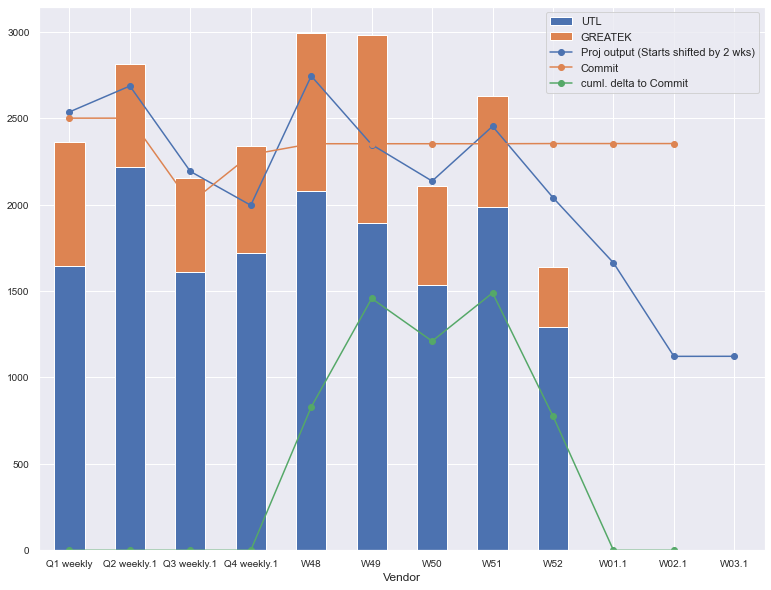

In [44]:









data_msp4.iloc[-3, data_msp4.columns.get_loc('W03.1')] =start_msop3




display(data_msp4)

msptt=data_msp4.T    ######## for graph new data###
msptt.reset_index(inplace=True)
msttT=msptt.rename(columns =msptt.iloc[1])
msTT1=msttT.iloc[3: , :]

msTT1.reset_index(inplace=True,drop=True)
msTT1=msTT1.set_index('Vendor').iloc[:-1,:].round(0)

#QFTT1.iloc[:,:-1]






display(msTT1)



bx = msTT1.iloc[:,0:-3].plot(kind='bar',stacked='True',figsize = (13,10),fontsize=10)
msTT1.iloc[:,[-3,-2,-1]].plot(linestyle='-', marker='o', ax = bx,figsize = (13,10),fontsize=10)


#Dl_d.to_excel('output&strt_tracker_QFN_Nw_file.xlsx')





In [45]:
data_msp4.to_excel('MSOP_.xlsx')

# SC70

In [46]:
#### convert excel to dataframe ### step 1
wb1= load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
data5 = pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='MSOP Tracker')

data_sc71 = data5.iloc[:,0:3] ###############     step 1 qfn 
data_sc72= (data5.iloc[:,6:10]).round(0).fillna('0').astype(int)
data_sc73=data5.iloc[:,[-7,-6,-5,-4,-3,-2,-1]].round(0).fillna('0').astype(int) 
data_sc74 = pd.concat([data_sc71,data_sc72,data_sc73],axis=1)
#[data_Qfn


display(data_sc74) 

,Unnamed: 0,Vendor,Vendor SAP name,Q1 weekly,Q2 weekly.1,Q3 weekly.1,Q4 weekly.1,W48,W49,W50,W51,W52,W01.1,W02.1
0,MSOP,UTL,UTAC_C2_TH,1642,2218,1610,1718,2079,1892,1536,1986,1294,0,0
1,MSOP,GREATEK,GRTK_ML_TW,721,597,545,620,916,1087,569,645,346,0,0
2,MSOP,Proj output (Starts shifted by 2 wks),NaN,2536,2686,2192,1996,2744,2347,2136,2453,2040,1663,1122
3,MSOP,Commit,NaN,2500,2500,2010,2289,2352,2352,2352,2352,2353,2353,2353
4,MSOP,cuml. delta to Commit,NaN,0,0,0,0,829,1457,1210,1489,776,0,0


In [47]:
### to get the sum of all package type as per W43 2022 ### Step 2 ## for QFN
wb1 = load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
#print(wb)
output5= pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='Output data')
#sheet = wb['Output data']
s70 = output5.iloc[36:38,[9, -1]]
s70.columns = ['packge group', 'W52'] 
#dataframe_3= dataframe2.iloc[3:] 

sc7 = s70.reset_index(drop=True)
sc71=sc7.fillna(0).loc[:,'W52'].div(1000).round(0)


display(sc71)

0    581.0
1    518.0
Name: W52, dtype: float64

In [48]:
wb1= load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
#print(wb)
start5= pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='Starts data')
#print(sheet_1)
sc= start5.iloc[35:37,[9,-1]] 

sc1= sc.rename(columns =sc.iloc[0]) 
#print('new_dataframe : ')

sc2 = sc1.reset_index(drop=True) 

sc2.columns = ['Vendor', 'W52']
starts_sc3= sc2['W52'].sum()/1000 

print(round(starts_sc3))

602


In [49]:
[data_sc74.insert(i, '', np.nan, allow_duplicates=True) for i in range(data_sc74.shape[1],13 ,-1,)]
[data_sc74.insert(i, '', np.nan, allow_duplicates=True) for i in range(data_sc74.shape[1],14 ,-2,)]


data_sc74.rename(columns={data_sc74.columns[-1]: 'W03.1'},inplace=True)



,Unnamed: 0,Vendor,Vendor SAP name,Q1 weekly,Q2 weekly.1,Q3 weekly.1,Q4 weekly.1,W48,W49,W50,W51,W52,W01.1,W02.1,W03.1,W03.1
0,MSOP,UTL,UTAC_C2_TH,1642,2218,1610,1718,2079,1892,1536,1986,1294,0,0,NaN,NaN
1,MSOP,GREATEK,GRTK_ML_TW,721,597,545,620,916,1087,569,645,346,0,0,NaN,NaN
2,MSOP,Proj output (Starts shifted by 2 wks),NaN,2536,2686,2192,1996,2744,2347,2136,2453,2040,1663,1122,602.226,602.226
3,MSOP,Commit,NaN,2500,2500,2010,2289,2352,2352,2352,2352,2353,2353,2353,NaN,NaN
4,MSOP,cuml. delta to Commit,NaN,0,0,0,0,829,1457,1210,1489,776,0,0,NaN,NaN


,UTL,GREATEK,Proj output (Starts shifted by 2 wks),Commit,cuml. delta to Commit
Vendor,,,,,
Q1 weekly,1642,721,2536,2500,0
Q2 weekly.1,2218,597,2686,2500,0
Q3 weekly.1,1610,545,2192,2010,0
Q4 weekly.1,1718,620,1996,2289,0
W48,2079,916,2744,2352,829
W49,1892,1087,2347,2352,1457
W50,1536,569,2136,2352,1210
W51,1986,645,2453,2352,1489
W52,1294,346,2040,2353,776


<AxesSubplot:xlabel='Vendor'>

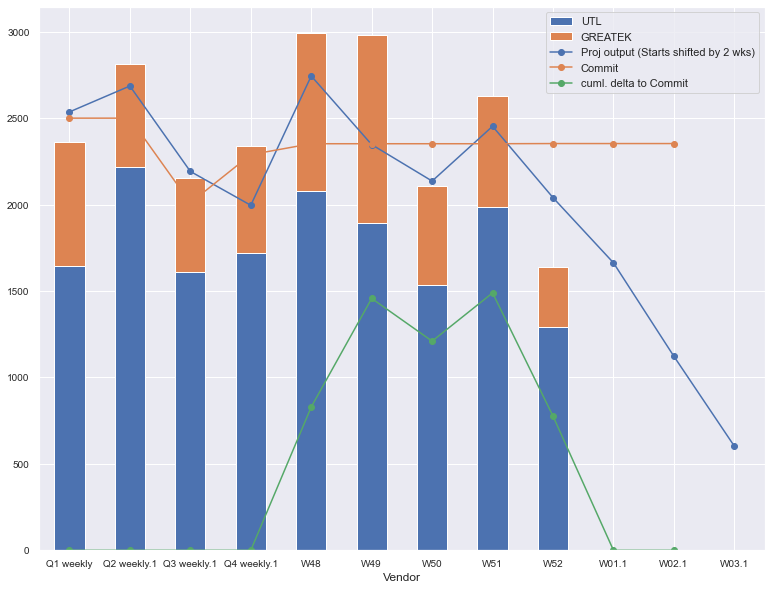

In [50]:









data_sc74.iloc[-3, data_sc74.columns.get_loc('W03.1')] =starts_sc3 




display(data_sc74)

scptt=data_sc74.T    ######## for graph new data###
scptt.reset_index(inplace=True)
scttT=scptt.rename(columns =scptt.iloc[1])
scTT1=scttT.iloc[3: , :]

scTT1.reset_index(inplace=True,drop=True)
scTT2=scTT1.set_index('Vendor').iloc[:-1,:].round(0)

#QFTT1.iloc[:,:-1]






display(scTT2)



cx = scTT2.iloc[:,0:-3].plot(kind='bar',stacked='True',figsize = (13,10),fontsize=10)
scTT2.iloc[:,[-3,-2,-1]].plot(linestyle='-', marker='o', ax = cx,figsize = (13,10),fontsize=10)


#Dl_d.to_excel('output&strt_tracker_QFN_Nw_file.xlsx')







# QSOP

In [51]:
#### convert excel to dataframe ### step 1
wb1= load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
data6 = pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='QSOP Tracker')

data_qsop1 = data6.iloc[:,0:3] ###############     step 1 qfn 
data_qsop2= (data6.iloc[:,6:10]).round(0).fillna('0').astype(int)
data_qsop3=data6.iloc[:,[-7,-6,-5,-4,-3,-2,-1]].round(0).fillna('0').astype(int) 
data_qsop4 = pd.concat([data_qsop1,data_qsop2,data_qsop3],axis=1)
#[data_Qfn


display(data_qsop4)

,Unnamed: 0,Vendor,Vendor SAP name,Q1 weekly,Q2 weekly.1,Q3 weekly.1,Q4 weekly.1,W48,W49,W50,W51,W52,W01.1,W02.1
0,QSOP,CARSEM-M,CARS_IM_MY,88,88,84,41,0,0,71,0,82,0,0
1,QSOP,GREATEK,GRTK_ML_TW,158,125,100,112,82,102,138,63,69,0,0
2,QSOP,UTL,UTAC_C2_TH,506,665,376,436,185,294,148,595,212,0,0
3,QSOP,Proj output (Starts shifted by 2 wks),NaN,797,856,568,516,387,328,422,419,765,279,387
4,QSOP,Commit,NaN,780,645,500,427,427,427,427,427,428,428,428
5,QSOP,cuml. delta to Commit,NaN,0,0,0,0,2044,2013,1943,2174,2110,0,0


In [52]:
### to get the sum of all package type as per W43 2022 ### Step 2 ## for QFN
wb1 = load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
#print(wb)
output6 = pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='Output data')
#sheet = wb['Output data']
qs = output6.iloc[33:36,[9, -1]]
qs.columns = ['packge group', 'W52'] 
###dataframe_3= dataframe2.iloc[3:] 

qso = qs.reset_index(drop=True)
qso1=qso.fillna(0).loc[:,'W52'].div(1000).round(0)


display(qso1)

0    212.0
1     69.0
2     82.0
Name: W52, dtype: float64

In [53]:
#d_qs

In [54]:
wb1= load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
#print(wb)
start6= pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='Starts data')
#print(sheet_1)
qsop= start6.iloc[32:35,[9,-1]] 

qsop1= qsop.rename(columns =qsop.iloc[0]) 
#print('new_dataframe : ')

qsop2 = qsop1.reset_index(drop=True) 

qsop2.columns = ['Vendor', 'W52']
starts_qsop3= qsop2['W52'].sum()/1000 


print(round(starts_qsop3))


387


In [55]:
[data_qsop4.insert(i, '', np.nan, allow_duplicates=True) for i in range(data_qsop4.shape[1],13 ,-1,)]
[data_qsop4.insert(i, '', np.nan, allow_duplicates=True) for i in range(data_qsop4.shape[1],14 ,-2,)]


data_qsop4.rename(columns={data_qsop4.columns[-1]: 'W03.1'},inplace=True)




In [56]:
data_qsop4.iloc[-3, data_qsop4.columns.get_loc('W03.1')] =starts_qsop3 

data_qsop4

,Unnamed: 0,Vendor,Vendor SAP name,Q1 weekly,Q2 weekly.1,Q3 weekly.1,Q4 weekly.1,W48,W49,W50,W51,W52,W01.1,W02.1,W03.1,W03.1
0,QSOP,CARSEM-M,CARS_IM_MY,88,88,84,41,0,0,71,0,82,0,0,NaN,NaN
1,QSOP,GREATEK,GRTK_ML_TW,158,125,100,112,82,102,138,63,69,0,0,NaN,NaN
2,QSOP,UTL,UTAC_C2_TH,506,665,376,436,185,294,148,595,212,0,0,NaN,NaN
3,QSOP,Proj output (Starts shifted by 2 wks),NaN,797,856,568,516,387,328,422,419,765,279,387,387.404,387.404
4,QSOP,Commit,NaN,780,645,500,427,427,427,427,427,428,428,428,NaN,NaN
5,QSOP,cuml. delta to Commit,NaN,0,0,0,0,2044,2013,1943,2174,2110,0,0,NaN,NaN


,CARSEM-M,GREATEK,UTL,Proj output (Starts shifted by 2 wks),Commit,cuml. delta to Commit
Vendor,,,,,,
Q1 weekly,88,158,506,797,780,0
Q2 weekly.1,88,125,665,856,645,0
Q3 weekly.1,84,100,376,568,500,0
Q4 weekly.1,41,112,436,516,427,0
W48,0,82,185,387,427,2044
W49,0,102,294,328,427,2013
W50,71,138,148,422,427,1943
W51,0,63,595,419,427,2174
W52,82,69,212,765,428,2110


<AxesSubplot:xlabel='Vendor'>

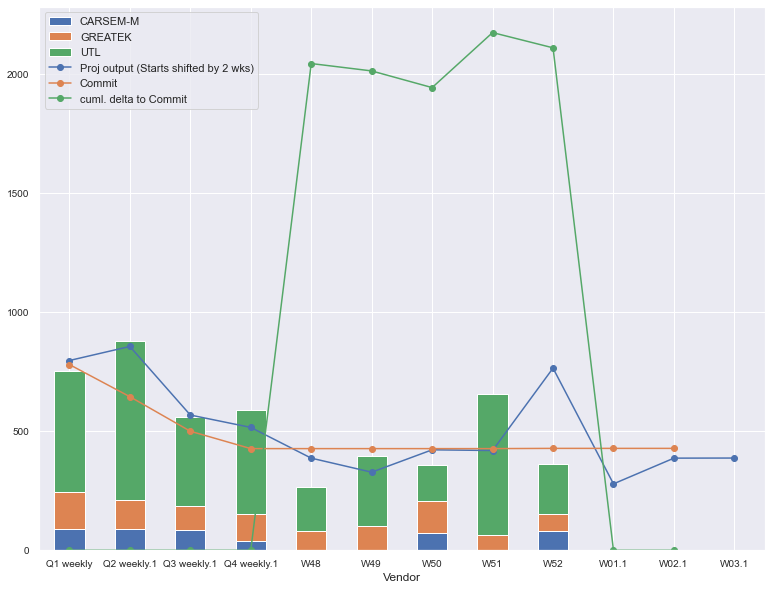

In [57]:


qsoptt=data_qsop4.T    ######## for graph new data###
qsoptt.reset_index(inplace=True)
qsottT=qsoptt.rename(columns =qsoptt.iloc[1])
qsoTT1=qsottT.iloc[3: , :]

qsoTT1.reset_index(inplace=True,drop=True)
qsoTT2=qsoTT1.set_index('Vendor').iloc[:-1,:].round(0)

#QFTT1.iloc[:,:-1]






display(qsoTT2)



ddx = qsoTT2.iloc[:,0:-3].plot(kind='bar',stacked='True',figsize = (13,10),fontsize=10)
qsoTT2.iloc[:,[-3,-2,-1]].plot(linestyle='-', marker='o', ax = ddx,figsize = (13,10),fontsize=10)


#Dl_d.to_excel('output&strt_tracker_QFN_Nw_file.xlsx')











## SOT23

In [58]:
#### convert excel to dataframe ### step 1
wb1= load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
data7 = pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='SOT23 Tracker')

data_sot21 = data7.iloc[:,0:3] ###############     step 1 qfn 
data_sot22= (data7.iloc[:,6:10]).round(0).fillna('0').astype(int)
data_sot23=data7.iloc[:,[-7,-6,-5,-4,-3,-2,-1]].round(0).fillna('0').astype(int) 
data_sot24 = pd.concat([data_sot21,data_sot22,data_sot23],axis=1)
#[data_Qfn

#str_3q.rename(columns={str_3q.columns[-1]: '2022_W1'},inplace=True)
#display(data_soic4)######
display(data_sot24) 

,Unnamed: 0,Vendor,Vendor SAP name,Q1 weekly,Q2 weekly.1,Q3 weekly.1,Q4 weekly.1,W48,W49,W50,W51,W52,W01.1,W02.1
0,SOT23,UTL,UTAC_C2_TH,8571,7375,6690,5378,5845,3739,5378,5777,6491,0,0
1,SOT23,CARSEM-M,CARS_IM_MY,900,896,796,664,591,628,666,989,363,0,0
2,SOT23,GREATEK,GRTK_ML_TW,815,653,366,629,22,1686,361,885,1096,0,0
3,SOT23,Proj output (Starts shifted by 2 wks),NaN,10244,9003,7928,5755,9137,7746,4737,5608,7059,8697,5352
4,SOT23,Commit,NaN,9050,8300,7730,6715,6715,6715,6715,6715,6716,6716,6716
5,SOT23,cuml. delta to Commit,NaN,0,0,0,0,-1781,-2442,-2752,-1816,-582,0,0


In [59]:
### to get the sum of all package type as per W43 2022 ### Step 2 ## for QFN
wb1 = load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
#print(wb)
output7 = pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='Output data')
#sheet = wb['Output data']
so = output7.iloc[43:46,[9, -1]]
so.columns = ['packge group', 'W52'] 
#dataframe_3= dataframe2.iloc[3:] 

sot = so.reset_index(drop=True)
sot21=sot.fillna(0).loc[:,'W52'].div(1000).round(0)


display(sot21)

0    6491.0
1    1096.0
2     363.0
Name: W52, dtype: float64

In [60]:
wb1= load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
#print(wb)
start7= pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='Starts data')
#print(sheet_1)
strt_sot2= start7.iloc[42:45,[9,-1]] 
#n = 2
#sheet_3= sheet_2.iloc[n:]
#display(sheet_5)
strt_sot3= strt_sot2.rename(columns =strt_sot2.iloc[0]) 
#print('new_dataframe : ')

strt_sot4 = strt_sot3.reset_index(drop=True) 

strt_sot4.columns = ['Vendor', 'W52']
starts_sot5= strt_sot4['W52'].sum()/1000 ### step 3(a) for week 45
#df6a= sheet_5.reset_index(drop=True)
#df7a= df6a.rename(columns =df6a.iloc[0])##to rename row as column name
#df8a= sheet_5.iloc[1: , :] ## select all rows after first row onwards


print(round(starts_sot5))

5352


In [61]:
[data_sot24.insert(i, '', np.nan, allow_duplicates=True) for i in range(data_sot24.shape[1],13 ,-1,)]
[data_sot24.insert(i, '', np.nan, allow_duplicates=True) for i in range(data_sot24.shape[1],14 ,-2,)]


data_sot24.rename(columns={data_sot24.columns[-1]: 'W03.1'},inplace=True)



,UTL,CARSEM-M,GREATEK,Proj output (Starts shifted by 2 wks),Commit,cuml. delta to Commit
Vendor,,,,,,
Q1 weekly,8571,900,815,10244,9050,0
Q2 weekly.1,7375,896,653,9003,8300,0
Q3 weekly.1,6690,796,366,7928,7730,0
Q4 weekly.1,5378,664,629,5755,6715,0
W48,5845,591,22,9137,6715,-1781
W49,3739,628,1686,7746,6715,-2442
W50,5378,666,361,4737,6715,-2752
W51,5777,989,885,5608,6715,-1816
W52,6491,363,1096,7059,6716,-582


<AxesSubplot:xlabel='Vendor'>

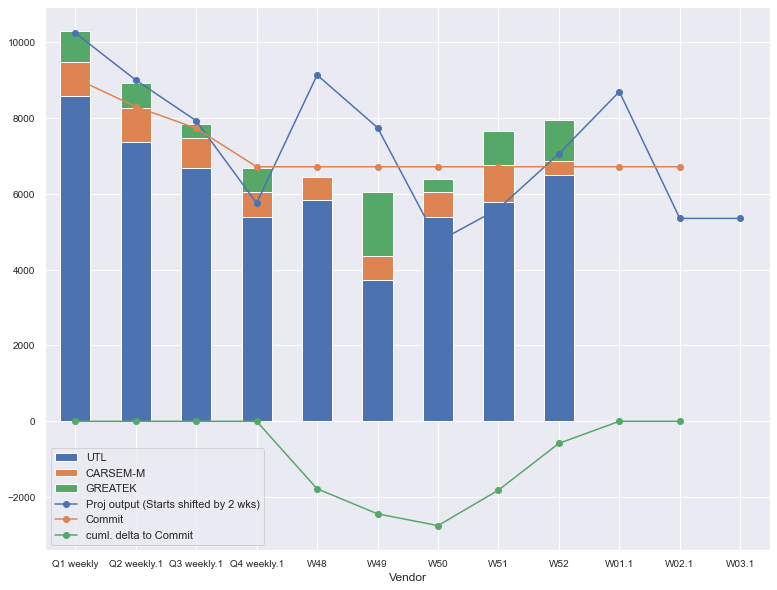

In [62]:



#data_msp4.iloc[-3,data_msp4.columns.get_loc('W03.1')] =starts_flip 

data_sot24.iloc[-3, data_sot24.columns.get_loc('W03.1')] =starts_sot5 

data_sot24
#QFN_T = pd.concat([Dl_d,px],axis=1) 

#display(QFN_T)

soptt=data_sot24.T    ######## for graph new data###
soptt.reset_index(inplace=True)
sottT=soptt.rename(columns =soptt.iloc[1])
soTT1=sottT.iloc[3: , :]

soTT1.reset_index(inplace=True,drop=True)
soTT2=soTT1.set_index('Vendor').iloc[:-1,:].round(0)

#QFTT1.iloc[:,:-1]






display(soTT2)



dx = soTT2.iloc[:,0:-3].plot(kind='bar',stacked='True',figsize = (13,10),fontsize=10)
soTT2.iloc[:,[-3,-2,-1]].plot(linestyle='-', marker='o', ax = dx,figsize = (13,10),fontsize=10)


#Dl_d.to_excel('output&strt_tracker_QFN_Nw_file.xlsx')









# SSOP

In [63]:
#### convert excel to dataframe ### step 1
wb1= load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
data8 = pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='SSOP Tracker')

data_sso1 = data8.iloc[:,0:3] ###############     step 1 qfn 
data_sso2= (data8.iloc[:,6:10]).round(0).fillna('0').astype(int)
data_sso3=data8.iloc[:,[-7,-6,-5,-4,-3,-2,-1]].round(0).fillna('0').astype(int)
data_sso4 = pd.concat([data_sso1,data_sso2,data_sso3],axis=1)
#[data_Qfn

#str_3q.rename(columns={str_3q.columns[-1]: '2022_W1'},inplace=True)
#display(data_soic4)######
display(data_sso4) 

,Unnamed: 0,Vendor,Vendor SAP name,Q1 weekly,Q2 weekly.1,Q3 weekly.1,Q4 weekly.1,W48,W49,W50,W51,W52,W01.1,W02.1
0,SSOP,ATP,AMKR_ML_PH,319,359,241,216,322,123,192,229,327,0,0
1,SSOP,CARSEM-M,CARS_IM_MY,17,22,19,19,0,16,6,34,32,0,0
2,SSOP,GREATEK,GRTK_ML_TW,183,204,141,145,163,366,178,90,205,0,0
3,SSOP,UTL,UTAC_C2_TH,2,1,45,70,117,67,82,104,51,0,0
4,SSOP,Proj output (Starts shifted by 2 wks),NaN,538,593,623,477,637,717,240,536,446,950,368
5,SSOP,Commit,NaN,500,580,480,639,668,668,668,668,669,668,669
6,SSOP,cuml. delta to Commit,NaN,0,0,0,0,-1805,-1902,-2111,-2322,-2376,0,0


In [64]:
### to get the sum of all package type as per W43 2022 ### Step 2 ## for QFN
wb1 = load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
#print(wb)
output8 = pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='Output data')
#sheet = wb['Output data']
ss = output8.iloc[46:50,[9, -1]]
ss.columns = ['packge group', 'W52'] 
#dataframe_3= dataframe2.iloc[3:] 

sso = ss.reset_index(drop=True)
sso1=sso.fillna(0).loc[:,'W52'].div(1000).round(0)
#QFN.loc[:,'W43'].div(1000).round(0)
#d3 = d2.iloc[1: , :] ## select all rows after first row onwards


display(sso1)

0    205.0
1    327.0
2     51.0
3     32.0
Name: W52, dtype: float64

In [65]:
wb1= load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
#print(wb)
start8= pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='Starts data')
#print(sheet_1)
sheetl_sso2= start8.iloc[45:49,[9,-1]] 
#n = 2
#sheet_3= sheet_2.iloc[n:]
#display(sheet_5)
sheetl_sso3= sheetl_sso2.rename(columns =sheetl_sso2.iloc[0]) 
#print('new_dataframe : ')

sheetl_sso4 = sheetl_sso3.reset_index(drop=True) 

sheetl_sso4.columns = ['Vendor', 'W52']
starts_sso5= sheetl_sso4['W52'].sum()/1000 
#df6a= sheet_5.reset_index(drop=True)
#df7a= df6a.rename(columns =df6a.iloc[0])##to rename row as column name
#df8a= sheet_5.iloc[1: , :] ## select all rows after first row onwards


print(round(starts_sso5))

368


In [66]:
data_sso4


,Unnamed: 0,Vendor,Vendor SAP name,Q1 weekly,Q2 weekly.1,Q3 weekly.1,Q4 weekly.1,W48,W49,W50,W51,W52,W01.1,W02.1
0,SSOP,ATP,AMKR_ML_PH,319,359,241,216,322,123,192,229,327,0,0
1,SSOP,CARSEM-M,CARS_IM_MY,17,22,19,19,0,16,6,34,32,0,0
2,SSOP,GREATEK,GRTK_ML_TW,183,204,141,145,163,366,178,90,205,0,0
3,SSOP,UTL,UTAC_C2_TH,2,1,45,70,117,67,82,104,51,0,0
4,SSOP,Proj output (Starts shifted by 2 wks),NaN,538,593,623,477,637,717,240,536,446,950,368
5,SSOP,Commit,NaN,500,580,480,639,668,668,668,668,669,668,669
6,SSOP,cuml. delta to Commit,NaN,0,0,0,0,-1805,-1902,-2111,-2322,-2376,0,0


In [67]:
[data_sso4.insert(i, '', np.nan, allow_duplicates=True) for i in range(data_sso4.shape[1],13 ,-1,)]
[data_sso4.insert(i, '', np.nan, allow_duplicates=True) for i in range(data_sso4.shape[1],14 ,-2,)]


data_sso4.rename(columns={data_sso4.columns[-1]: 'W03.1'},inplace=True)





,ATP,CARSEM-M,GREATEK,UTL,Proj output (Starts shifted by 2 wks),Commit,cuml. delta to Commit
Vendor,,,,,,,
Q1 weekly,319,17,183,2,538,500,0
Q2 weekly.1,359,22,204,1,593,580,0
Q3 weekly.1,241,19,141,45,623,480,0
Q4 weekly.1,216,19,145,70,477,639,0
W48,322,0,163,117,637,668,-1805
W49,123,16,366,67,717,668,-1902
W50,192,6,178,82,240,668,-2111
W51,229,34,90,104,536,668,-2322
W52,327,32,205,51,446,669,-2376


<AxesSubplot:xlabel='Vendor'>

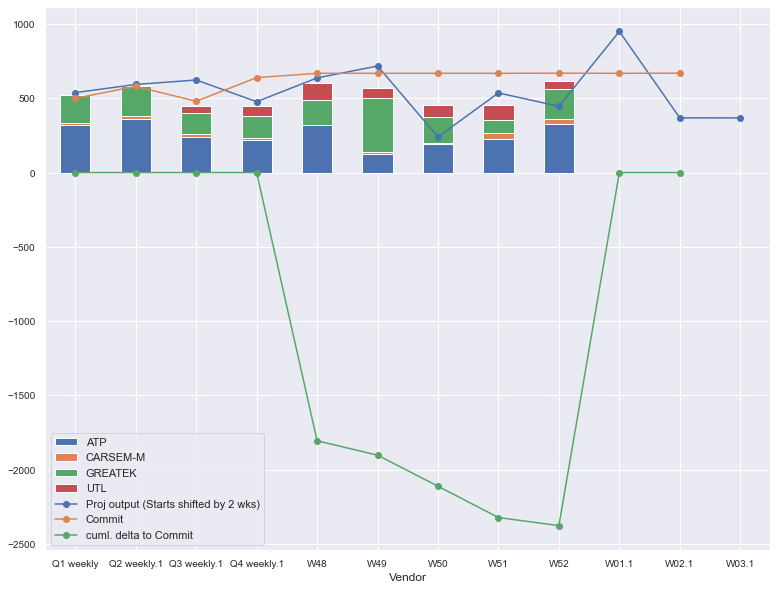

In [68]:

#data_msp4.iloc[-3,data_msp4.columns.get_loc('W03.1')] =starts_flip 

data_sso4.iloc[-3, data_sso4.columns.get_loc('W03.1')] =starts_sso5 

data_sso4
#QFN_T = pd.concat([Dl_d,px],axis=1) ### final excel sheet 1

#display(QFN_T)

ssott=data_sso4.T    ######## for graph new data###
ssott.reset_index(inplace=True)
ssotT=ssott.rename(columns =ssott.iloc[1])
ssoT1=ssotT.iloc[3: , :]

ssoT1.reset_index(inplace=True,drop=True)
ssoT2=ssoT1.set_index('Vendor').iloc[:-1,:].round(0)

#QFTT1.iloc[:,:-1]






display(ssoT2)



ex = ssoT2.iloc[:,0:-3].plot(kind='bar',stacked='True',figsize = (13,10),fontsize=10)
ssoT2.iloc[:,[-3,-2,-1]].plot(linestyle='-', marker='o', ax = ex,figsize = (13,10),fontsize=10)














# TO92

In [69]:
#### convert excel to dataframe ### step 1
wb1= load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
data9 = pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='TO92 Tracker')

data_tss1 = data9.iloc[:,0:3] ###############     step 1 qfn 
data_tss2= (data9.iloc[:,6:10]).round(0).fillna('0').astype(int)
data_tss3=data9.iloc[:,[-7,-6,-5,-4,-3,-2,-1]].round(0).fillna('0').astype(int) 
data_tss4 = pd.concat([data_tss1,data_tss2,data_tss3],axis=1)
#[data_Qfn

#str_3q.rename(columns={str_3q.columns[-1]: '2022_W1'},inplace=True)
#display(data_soic4)######
display(data_tss4) 



,Unnamed: 0,Vendor,Vendor SAP name,Q1 weekly,Q2 weekly.1,Q3 weekly.1,Q4 weekly.1,W48,W49,W50,W51,W52,W01.1,W02.1
0,TO92,CIRTEK,CIRT_BN_PH,1279,1796,1803,2526,3067,3145,3034,1888,1233,0,0
1,TO92,GREATEK,GRTK_ML_TW,45,280,0,0,0,0,0,0,0,0,0
2,TO92,Proj output (Starts shifted by 2 wks),NaN,1326,1906,1901,2166,2956,3036,3262,3038,1753,1352,305
3,TO92,Commit,NaN,1500,1750,1830,1835,1470,1470,1470,1470,1470,1470,1470
4,TO92,cuml. delta to Commit,NaN,0,0,0,0,4840,6514,8077,8495,8258,0,0


In [70]:
### to get the sum of all package type as per W43 2022 ### Step 2 ## for QFN
wb1 = load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
#print(wb)
output8= pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='Output data')
#sheet = wb['Output data']
to = output8.iloc[50:52,[9, -1]]
to.columns = ['packge group', 'W52'] 
#dataframe_3= dataframe2.iloc[3:] 

tss = to.reset_index(drop=True)
tsso1=tss.fillna(0).loc[:,'W52'].div(1000).round(0)


display(tsso1)

0    1233.0
1       0.0
Name: W52, dtype: float64

In [71]:
wb1= load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
#print(wb)
start8= pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='Starts data')
#print(sheet_1)
sheetl_to2= start8.iloc[49:51,[9,-1]] 

sheetl_to3= sheetl_to2.rename(columns =sheetl_to2.iloc[0]) 
#print('new_dataframe : ')

sheetl_to4 = sheetl_to3.reset_index(drop=True) 

sheetl_to4.columns = ['Vendor', 'W52']
starts_to5= sheetl_to4['W52'].sum()/1000 ### step 3(a) for week 45


print(round(starts_to5))

305


In [72]:
[data_tss4.insert(i, '', np.nan, allow_duplicates=True) for i in range(data_tss4.shape[1],13 ,-1,)]
[data_tss4.insert(i, '', np.nan, allow_duplicates=True) for i in range(data_tss4.shape[1],14 ,-2,)]


data_tss4.rename(columns={data_tss4.columns[-1]: 'W03.1'},inplace=True)


,CIRTEK,GREATEK,Proj output (Starts shifted by 2 wks),Commit,cuml. delta to Commit
Vendor,,,,,
Q1 weekly,1279,45,1326,1500,0
Q2 weekly.1,1796,280,1906,1750,0
Q3 weekly.1,1803,0,1901,1830,0
Q4 weekly.1,2526,0,2166,1835,0
W48,3067,0,2956,1470,4840
W49,3145,0,3036,1470,6514
W50,3034,0,3262,1470,8077
W51,1888,0,3038,1470,8495
W52,1233,0,1753,1470,8258


<AxesSubplot:xlabel='Vendor'>

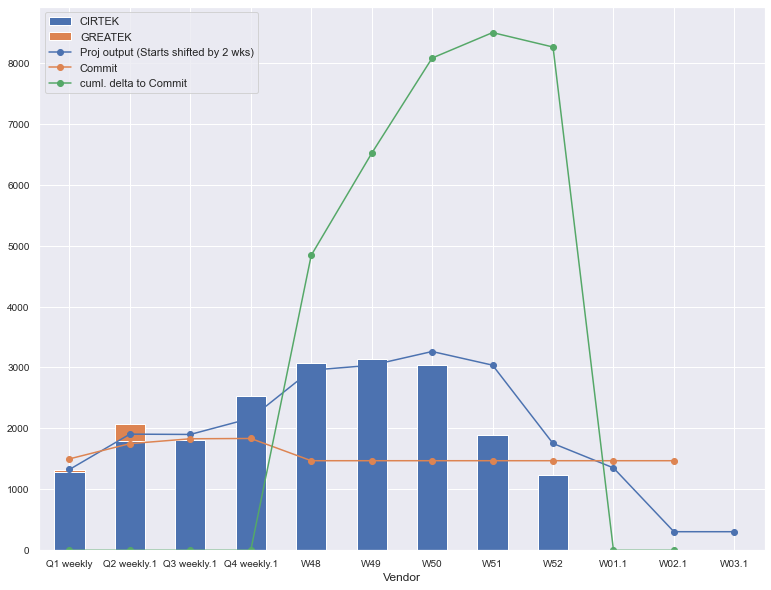

In [73]:


data_tss4.iloc[-3, data_tss4.columns.get_loc('W03.1')] =starts_to5 
data_tss4



ts0tt=data_tss4.T    ######## for graph new data###
ts0tt.reset_index(inplace=True)
ts0tT=ts0tt.rename(columns =ts0tt.iloc[1])
ts0T1=ts0tT.iloc[3: , :]

ts0T1.reset_index(inplace=True,drop=True)
ts0T2=ts0T1.set_index('Vendor').iloc[:-1,:].round(0)

#QFTT1.iloc[:,:-1]






display(ts0T2)



dx = ts0T2.iloc[:,0:-3].plot(kind='bar',stacked='True',figsize = (13,10),fontsize=10)
ts0T2.iloc[:,[-3,-2,-1]].plot(linestyle='-', marker='o', ax = dx,figsize = (13,10),fontsize=10)


#Dl_d.to_excel('output&strt_tracker_QFN_Nw_file.xlsx')









# TSOC

In [74]:
#### convert excel to dataframe ### step 1
wb1= load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
data9 = pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='TSOC Tracker')

data_tsoc1 = data9.iloc[:,0:3] ###############     step 1 qfn 
data_tsoc2= (data9.iloc[:,6:10]).round(0).fillna('0').astype(int)
data_tsoc3=data9.iloc[:,[-7,-6,-5,-4,-3,-2,-1]].round(0).fillna('0').astype(int) 
data_tsoc4 = pd.concat([data_tsoc1,data_tsoc2,data_tsoc3],axis=1)
#[data_Qfn

#str_3q.rename(columns={str_3q.columns[-1]: '2022_W1'},inplace=True)
#display(data_soic4)######
display(data_tsoc4) 

,Unnamed: 0,Vendor,Vendor SAP name,Q1 weekly,Q2 weekly.1,Q3 weekly.1,Q4 weekly.1,W48,W49,W50,W51,W52,W01.1,W02.1
0,TSOC,CIRTEK,CIRT_BN_PH,1060,1197,1195,1079,1243,1192,828,967,483,0,0
1,TSOC,UTL,UTAC_C2_TH,177,222,262,99,0,155,75,34,400,0,0
2,TSOC,Proj output (Starts shifted by 2 wks),NaN,1293,1380,1462,960,1785,1219,819,569,859,890,451
3,TSOC,Commit,NaN,1103,1203,1400,970,970,970,970,970,970,970,970
4,TSOC,cuml. delta to Commit,NaN,0,0,0,0,2448,2826,2759,2790,2703,0,0


In [75]:
### to get the sum of all package type as per W43 2022 ### Step 2 ## for QFN
wb1 = load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
#print(wb)
output9= pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='Output data')
#sheet = wb['Output data']
tso = output9.iloc[52:54,[9, -1]]
tso.columns = ['packge group', 'W52'] 
#dataframe_3= dataframe2.iloc[3:]
tsoc = tso.reset_index(drop=True)
tsoc1=tss.fillna(0).loc[:,'W52'].div(1000).round(0)
#QFN.loc[:,'W43'].div(1000).round(0)
#d3 = d2.iloc[1: , :] ## select all rows after first row onwards


display(tsoc1)

0    1233.0
1       0.0
Name: W52, dtype: float64

In [76]:
wb1= load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
#print(wb)
start9= pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='Starts data')
#print(sheet_1)
sheetl_tos2= start9.iloc[51:53,[9,-1]] 

sheetl_tos3= sheetl_tos2.rename(columns =sheetl_tos2.iloc[0])
#print('new_dataframe : ')

sheetl_tos4 = sheetl_tos3.reset_index(drop=True) 

sheetl_tos4.columns = ['Vendor', 'W52']
starts_tos5= sheetl_tos4['W52'].sum()/1000 


print(round(starts_tos5))

451


In [77]:
sheetl_tos2

,Unnamed: 9,START_FY / START_QTR / START_WK.92
51,TSOC,451049
52,TSOC,NaN


In [78]:
[data_tsoc4.insert(i, '', np.nan, allow_duplicates=True) for i in range(data_tsoc4.shape[1],13 ,-1,)]
[data_tsoc4.insert(i, '', np.nan, allow_duplicates=True) for i in range(data_tsoc4.shape[1],14 ,-2,)]


data_tsoc4.rename(columns={data_tsoc4.columns[-1]: 'W03.1'},inplace=True)



,CIRTEK,UTL,Proj output (Starts shifted by 2 wks),Commit,cuml. delta to Commit
Vendor,,,,,
Q1 weekly,1060,177,1293,1103,0
Q2 weekly.1,1197,222,1380,1203,0
Q3 weekly.1,1195,262,1462,1400,0
Q4 weekly.1,1079,99,960,970,0
W48,1243,0,1785,970,2448
W49,1192,155,1219,970,2826
W50,828,75,819,970,2759
W51,967,34,569,970,2790
W52,483,400,859,970,2703


<AxesSubplot:xlabel='Vendor'>

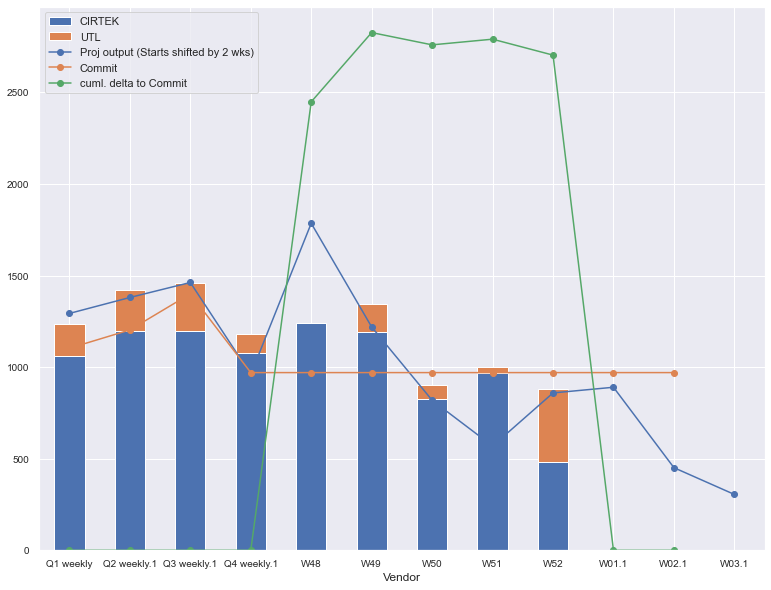

In [79]:




data_tsoc4.iloc[-3, data_tsoc4.columns.get_loc('W03.1')] =starts_to5 
data_tsoc4


tsctt=data_tsoc4.T    
tsctt.reset_index(inplace=True)
tsctT=tsctt.rename(columns =tsctt.iloc[1])
tscT1=tsctT.iloc[3: , :]

tscT1.reset_index(inplace=True,drop=True)
tscT2=tscT1.set_index('Vendor').iloc[:-1,:].round(0)








display(tscT2)



ex = tscT2.iloc[:,0:-3].plot(kind='bar',stacked='True',figsize = (13,10),fontsize=10)
tscT2.iloc[:,[-3,-2,-1]].plot(linestyle='-', marker='o', ax = ex,figsize = (13,10),fontsize=10)














# TSOT

In [80]:
#### convert excel to dataframe ### step 1
wb1= load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
data_4 = pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='TSOT Tracker')

data_tsot1 = data_4.iloc[:,0:3] ###############     step 1 qfn 
data_tsot2= (data_4.iloc[:,6:10]).round(0).fillna('0').astype(int)
data_tsot3=data_4.iloc[:,[-7,-6,-5,-4,-3,-2,-1]].round(0).fillna('0').astype(int) 
data_tsot4 = pd.concat([data_tsot1,data_tsot2,data_tsot3],axis=1)

display(data_tsot4) 


,Unnamed: 0,Vendor,Vendor SAP name,Q1 weekly,Q2 weekly.1,Q3 weekly.1,Q4 weekly.1,W48,W49,W50,W51,W52,W01.1,W02.1
0,TSOT,ATP,AMKR_ML_PH,218,136,217,218,39,95,368,87,102,0,0
1,TSOT,UTL,UTAC_C2_TH,79,120,156,127,96,0,0,292,21,0,0
2,TSOT,Proj output (Starts shifted by 2 wks),NaN,266,281,397,294,513,328,135,268,195,599,67
3,TSOT,Commit,NaN,260,260,260,218,195,195,195,195,195,195,195
4,TSOT,cuml. delta to Commit,NaN,0,0,0,0,1422,1323,1495,1678,1606,0,0


In [81]:
### to get the sum of all package type as per W43 2022 ### Step 2 ## for QFN
wb1 = load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
#print(wb)
output10 = pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='Output data')
#sheet = wb['Output data']
tsot = output10.iloc[54:56,[9, -1]]
tsot.columns = ['packge group', 'W52'] 
#dataframe_3= dataframe2.iloc[3:] 
tsot1 = tsot.reset_index(drop=True)
tsot2=tsot1.fillna(0).loc[:,'W52'].div(1000).round(0)


display(tsot2)


0    102.0
1     21.0
Name: W52, dtype: float64

In [82]:
wb1= load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
#print(wb)
start10= pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='Starts data')
#print(sheet_1)
sheetl_tst2= start10.iloc[53:55,[9,-1]] 
#n = 2
#sheet_3= sheet_2.iloc[n:]
#display(sheet_5)
sheetl_tst3= sheetl_tst2.rename(columns =sheetl_tst2.iloc[0]) 
#print('new_dataframe : ')

sheetl_tst4 = sheetl_tst3.reset_index(drop=True) 

sheetl_tst4.columns = ['Vendor', 'W52']
starts_tst5= sheetl_tst4['W52'].sum()/1000 


print(round(starts_tst5))

67


In [83]:
[data_tsot4.insert(i, '', np.nan, allow_duplicates=True) for i in range(data_tsot4.shape[1],13 ,-1,)]
[data_tsot4.insert(i, '', np.nan, allow_duplicates=True) for i in range(data_tsot4.shape[1],14 ,-2,)]


data_tsot4.rename(columns={data_tsot4.columns[-1]: 'W03.1'},inplace=True)




,ATP,UTL,Proj output (Starts shifted by 2 wks),Commit,cuml. delta to Commit
Vendor,,,,,
Q1 weekly,218,79,266,260,0
Q2 weekly.1,136,120,281,260,0
Q3 weekly.1,217,156,397,260,0
Q4 weekly.1,218,127,294,218,0
W48,39,96,513,195,1422
W49,95,0,328,195,1323
W50,368,0,135,195,1495
W51,87,292,268,195,1678
W52,102,21,195,195,1606


<AxesSubplot:xlabel='Vendor'>

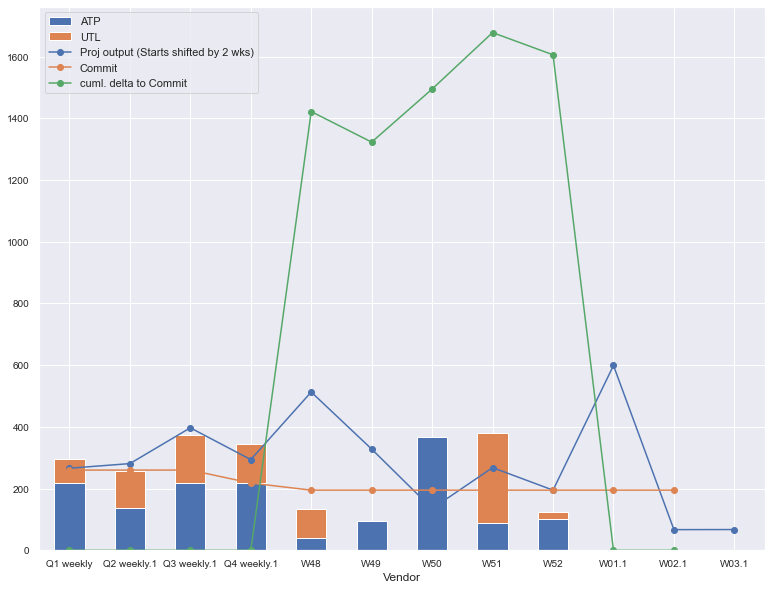

In [84]:



data_tsot4.iloc[-3, data_tsot4.columns.get_loc('W03.1')] =starts_tst5 
data_tsot4



tsott=data_tsot4.T    ######## for graph new data###
tsott.reset_index(inplace=True)
tsotT=tsott.rename(columns =tsott.iloc[1])
tsoT1=tsotT.iloc[3: , :]

tsoT1.reset_index(inplace=True,drop=True)
tsoT2=tsoT1.set_index('Vendor').iloc[:-1,:].round(0)








display(tsoT2)



fx = tsoT2.iloc[:,0:-3].plot(kind='bar',stacked='True',figsize = (13,10),fontsize=10)
tsoT2.iloc[:,[-3,-2,-1]].plot(linestyle='-', marker='o', ax = fx,figsize = (13,10),fontsize=10)















# TSSOP

In [85]:
#### convert excel to dataframe ### step 1
wb1= load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
data11 = pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='TSSOP Tracker')

data_tsso1 = data11.iloc[:,0:3] ###############     step 1 qfn 
data_tsso2= (data11.iloc[:,6:10]).round(0).fillna('0').astype(int
data_tsso3=data11.iloc[:,[-7,-6,-5,-4,-3,-2,-1]].round(0).fillna('0').astype(int) 
data_tsso4 = pd.concat([data_tsso1,data_tsso2,data_tsso3],axis=1)

display(data_tsso4) 


,Unnamed: 0,Vendor,Vendor SAP name,Q1 weekly,Q2 weekly.1,Q3 weekly.1,Q4 weekly.1,W48,W49,W50,W51,W52,W01.1,W02.1
0,TSSOP,UTL,UTAC_C2_TH,2077,1806,2233,2049,1766,2081,1453,2404,1855,0,0
1,TSSOP,ATP,AMKR_ML_PH,1332,1259,1114,974,1089,388,1116,417,895,0,0
2,TSSOP,CARSEM-M,CARS_IM_MY,172,264,205,196,124,323,149,33,282,0,0
3,TSSOP,GREATEK,GRTK_ML_TW,127,141,202,220,240,306,329,158,246,0,0
4,TSSOP,Proj output (Starts shifted by 2 wks),NaN,3728,3768,3827,3082,3564,3404,2973,3445,3184,2687,3446
5,TSSOP,Commit,NaN,3490,3590,3580,3358,3358,3358,3358,3358,3359,3359,3359
6,TSSOP,cuml. delta to Commit,NaN,0,0,0,0,2054,1793,1483,1137,1057,0,0


In [86]:
### to get the sum of all package type as per W43 2022 ### Step 2 ## for QFN
wb1 = load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
#print(wb)
output11 = pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='Output data')
#sheet = wb['Output data']
tsso = output11.iloc[56:61,[9, -1]]
tsso.columns = ['packge group', 'W52'] 
#dataframe_3= dataframe2.iloc[3:] 

tsso1 = tsso.reset_index(drop=True)
tsso2=tsso1.fillna(0).loc[:,'W52'].div(1000).round(0)


display(tsso2)


0    1855.0
1     895.0
2     282.0
3     246.0
Name: W52, dtype: float64

In [87]:
wb1= load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
#print(wb)
start11= pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='Starts data')
#print(sheet_1)
sheetl_tsso2= start11.iloc[55:61,[9,-1]] 
#n = 2
#sheet_3= sheet_2.iloc[n:]
#display(sheet_5)
sheetl_tsso3= sheetl_tsso2.rename(columns =sheetl_tsso2.iloc[0]) 
#print('new_dataframe : ')

sheetl_tsso4 = sheetl_tsso3.reset_index(drop=True) 

sheetl_tsso4.columns = ['Vendor', 'W52']
starts_tsso5= sheetl_tsso4['W52'].sum()/1000 


print(round(starts_tsso5))


3446


In [88]:

[data_tsso4.insert(i, '', np.nan, allow_duplicates=True) for i in range(data_tsso4.shape[1],13 ,-1,)]
[data_tsso4.insert(i, '', np.nan, allow_duplicates=True) for i in range(data_tsso4.shape[1],14 ,-2,)]


data_tsso4.rename(columns={data_tsso4.columns[-1]: 'W03.1'},inplace=True) #### main DATAFRAME


In [89]:
data_tsso4.iloc[-3, data_tsso4.columns.get_loc('W03.1')] =starts_tsso5
data_tsso4

,Unnamed: 0,Vendor,Vendor SAP name,Q1 weekly,Q2 weekly.1,Q3 weekly.1,Q4 weekly.1,W48,W49,W50,W51,W52,W01.1,W02.1,W03.1,W03.1
0,TSSOP,UTL,UTAC_C2_TH,2077,1806,2233,2049,1766,2081,1453,2404,1855,0,0,NaN,NaN
1,TSSOP,ATP,AMKR_ML_PH,1332,1259,1114,974,1089,388,1116,417,895,0,0,NaN,NaN
2,TSSOP,CARSEM-M,CARS_IM_MY,172,264,205,196,124,323,149,33,282,0,0,NaN,NaN
3,TSSOP,GREATEK,GRTK_ML_TW,127,141,202,220,240,306,329,158,246,0,0,NaN,NaN
4,TSSOP,Proj output (Starts shifted by 2 wks),NaN,3728,3768,3827,3082,3564,3404,2973,3445,3184,2687,3446,3446.358,3446.358
5,TSSOP,Commit,NaN,3490,3590,3580,3358,3358,3358,3358,3358,3359,3359,3359,NaN,NaN
6,TSSOP,cuml. delta to Commit,NaN,0,0,0,0,2054,1793,1483,1137,1057,0,0,NaN,NaN


In [90]:


tssott=data_tsso4.T    ######## for graph new data###
tssott.reset_index(inplace=True)
tssotT=tssott.rename(columns =tssott.iloc[1])
tssoT1=tssotT.iloc[3: , :]

tssoT1.reset_index(inplace=True,drop=True)
tssoT2=tssoT1.set_index('Vendor').iloc[:-1,:].round(0)

#QFTT1.iloc[:,:-1]

display(tssoT2)


,UTL,ATP,CARSEM-M,GREATEK,Proj output (Starts shifted by 2 wks),Commit,cuml. delta to Commit
Vendor,,,,,,,
Q1 weekly,2077,1332,172,127,3728,3490,0
Q2 weekly.1,1806,1259,264,141,3768,3590,0
Q3 weekly.1,2233,1114,205,202,3827,3580,0
Q4 weekly.1,2049,974,196,220,3082,3358,0
W48,1766,1089,124,240,3564,3358,2054
W49,2081,388,323,306,3404,3358,1793
W50,1453,1116,149,329,2973,3358,1483
W51,2404,417,33,158,3445,3358,1137
W52,1855,895,282,246,3184,3359,1057


<AxesSubplot:xlabel='Vendor'>

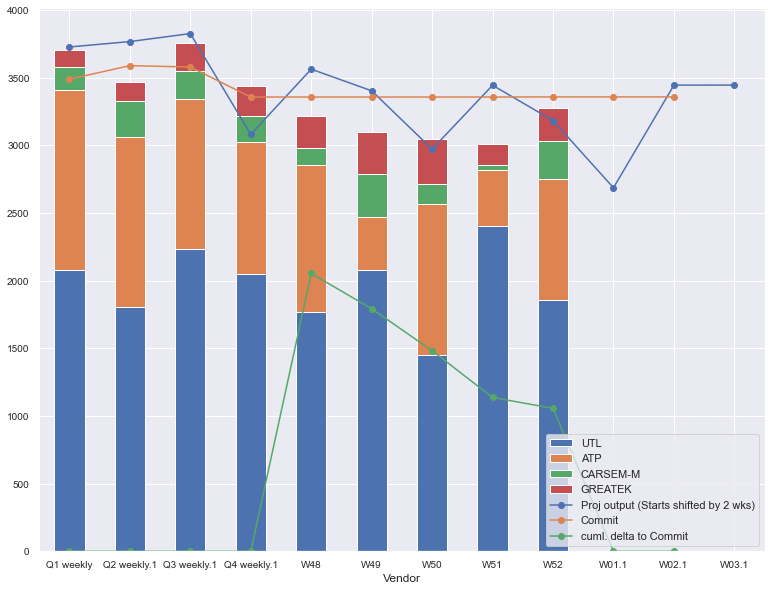

In [91]:





gx = tssoT2.iloc[:,0:-3].plot(kind='bar',stacked='True',figsize = (13,10),fontsize=10)
tssoT2.iloc[:,[-3,-2,-1]].plot(linestyle='-', marker='o', ax = gx,figsize = (13,10),fontsize=10)


















# OTHERS

In [92]:
#### convert excel to dataframe ### step 1
wb1= load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
data12 = pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='Others Tracker')

data_othr1 = data12.iloc[:,0:3] ###############     step 1 qfn 
data_othr2= (data12.iloc[:,6:10]).round(0).fillna('0').astype(int)
data_othr3=data12.iloc[:,[-7,-6,-5,-4,-3,-2,-1]].round(0).fillna('0').astype(int) 
data_othr4 = pd.concat([data_othr1,data_othr2,data_othr3],axis=1)

display(data_othr4) 


,Unnamed: 0,Vendor,Vendor SAP name,Q1 weekly,Q2 weekly.1,Q3 weekly.1,Q4 weekly.1,W48,W49,W50,W51,W52,W01.1,W02.1
0,OTHER,ASECL,ASE_CL_TW,915,759,708,882,1242,980,510,990,452,0,0
1,OTHER,GREATEK,GRTK_ML_TW,92,114,134,67,3,38,249,9,0,0,0
2,OTHER,ATP,AMKR_ML_PH,63,52,45,49,63,40,62,98,59,0,0
3,OTHER,CIRTEK,CIRT_BN_PH,146,163,191,163,115,96,129,181,84,0,0
4,OTHER,JCET,JCET_JY_CN,128,297,784,389,603,460,314,372,1111,0,0
5,OTHER,UTL,UTAC_C2_TH,16,2,2,7,4,10,14,24,5,0,0
6,OTHER,ASEK,ASE_KA_TW,38,50,143,94,177,130,87,62,106,0,0
7,OTHER,UDG,UTAC_DG_CN,3,4,0,0,0,0,0,0,0,0,0
8,OTHER,ATC,AMKR_SH_CN,0,0,1,15,0,0,3,0,35,0,0
9,OTHER,CARSEM-M,CARS_IM_MY,0,1,3,0,0,0,0,0,0,0,0


In [93]:
### to get the sum of all package type as per W43 2022 ### Step 2 ## for QFN
wb1 = load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
#print(wb)
output12 = pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='Output data')

oth = output12.iloc[12:23,[9, -1]]
oth.columns = ['packge group', 'W52'] 

othr_ = oth.reset_index(drop=True)
othr_1=othr_.fillna(0).loc[:,'W52'].div(1000).round(0)


display(othr_1)


0      452.0
1     1111.0
2      583.0
3      106.0
4       84.0
5       59.0
6        0.0
7        5.0
8        0.0
9        0.0
10      35.0
Name: W52, dtype: float64

In [94]:
#sheetl_othr2

In [95]:
wb1= load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
#print(wb)
start12 = pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='Starts data')
#print(sheet_1)
sheetl_othr2= start12.iloc[10:22,[9,-1]]
#n = 2
#sheet_3= sheet_2.iloc[n:]
#display(sheet_5)
sheetl_othr3= sheetl_othr2.rename(columns =sheetl_othr2.iloc[0])
#print('new_dataframe : ')

sheetl_othr4 = sheetl_othr3.reset_index(drop=True) 

sheetl_othr4.columns = ['Vendor', 'W52']
starts_othr5= sheetl_othr4['W52'].sum()/1000


print(round(starts_othr5))



1745


In [96]:

[data_othr4.insert(i, '', np.nan, allow_duplicates=True) for i in range(data_othr4.shape[1],13 ,-1,)]
[data_othr4.insert(i, '', np.nan, allow_duplicates=True) for i in range(data_othr4.shape[1],14 ,-2,)]


data_othr4.rename(columns={data_othr4.columns[-1]: 'W03.1'},inplace=True) #### main DATAFRAME





In [97]:
data_othr4.iloc[-3, data_othr4.columns.get_loc('W03.1')] =starts_othr5
data_othr4

,Unnamed: 0,Vendor,Vendor SAP name,Q1 weekly,Q2 weekly.1,Q3 weekly.1,Q4 weekly.1,W48,W49,W50,W51,W52,W01.1,W02.1,W03.1,W03.1
0,OTHER,ASECL,ASE_CL_TW,915,759,708,882,1242,980,510,990,452,0,0,NaN,NaN
1,OTHER,GREATEK,GRTK_ML_TW,92,114,134,67,3,38,249,9,0,0,0,NaN,NaN
2,OTHER,ATP,AMKR_ML_PH,63,52,45,49,63,40,62,98,59,0,0,NaN,NaN
3,OTHER,CIRTEK,CIRT_BN_PH,146,163,191,163,115,96,129,181,84,0,0,NaN,NaN
4,OTHER,JCET,JCET_JY_CN,128,297,784,389,603,460,314,372,1111,0,0,NaN,NaN
5,OTHER,UTL,UTAC_C2_TH,16,2,2,7,4,10,14,24,5,0,0,NaN,NaN
6,OTHER,ASEK,ASE_KA_TW,38,50,143,94,177,130,87,62,106,0,0,NaN,NaN
7,OTHER,UDG,UTAC_DG_CN,3,4,0,0,0,0,0,0,0,0,0,NaN,NaN
8,OTHER,ATC,AMKR_SH_CN,0,0,1,15,0,0,3,0,35,0,0,NaN,NaN
9,OTHER,CARSEM-M,CARS_IM_MY,0,1,3,0,0,0,0,0,0,0,0,NaN,NaN


,ASECL,GREATEK,ATP,CIRTEK,JCET,UTL,ASEK,UDG,ATC,CARSEM-M,Others,Proj output (Starts shifted by 2 wks),Commit,cuml. delta to Commit
Vendor,,,,,,,,,,,,,,
Q1 weekly,915,92,63,146,128,16,38,3,0,0,769,1892,1540,0
Q2 weekly.1,759,114,52,163,297,2,50,4,0,1,559,1812,2750,0
Q3 weekly.1,708,134,45,191,784,2,143,0,1,3,470,2364,2476,0
Q4 weekly.1,882,67,49,163,389,7,94,0,15,0,621,2113,2567,0
W48,1242,3,63,115,603,4,177,0,0,0,438,1997,2570,-1723
W49,980,38,40,96,460,10,130,0,0,0,454,2626,2570,-2086
W50,510,249,62,129,314,14,87,0,3,0,278,3135,2570,-3011
W51,990,9,98,181,372,24,62,0,0,0,345,1942,2570,-3501
W52,452,0,59,84,1111,5,106,0,35,0,583,3385,2570,-3635


<AxesSubplot:xlabel='Vendor'>

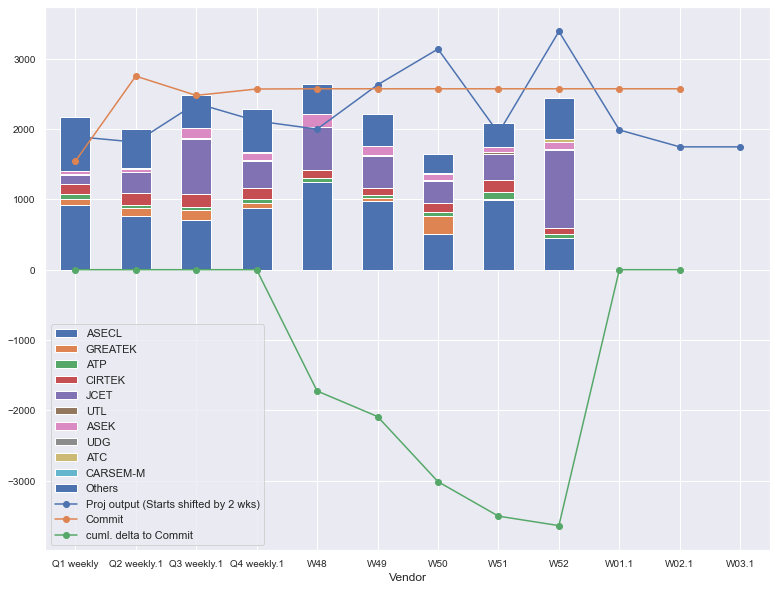

In [98]:


othrtt=data_othr4.T    ######## for graph new data###
othrtt.reset_index(inplace=True)
othrtT=othrtt.rename(columns =othrtt.iloc[1])
othrT1=othrtT.iloc[3: , :]

othrT1.reset_index(inplace=True,drop=True)
othrT2=othrT1.set_index('Vendor').iloc[:-1,:].round(0)

#QFTT1.iloc[:,:-1]

display(othrT2)







fx = othrT2.iloc[:,0:-3].plot(kind='bar',stacked='True',figsize = (13,10),fontsize=10)
othrT2.iloc[:,[-3,-2,-1]].plot(linestyle='-', marker='o', ax = fx,figsize = (13,10),fontsize=10)
















# OVERALL TRACKER

In [99]:
#### convert excel to dataframe ### step 1
wb1= load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
datal3 = pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='Overall Tracker')

data_ovll1 = datal3.iloc[:,[0]] ###############     step 1 qfn 
data_ovll2= (datal3.iloc[:,1:5]).round(0).fillna(0).astype(int)####from column 5 to 8
data_ovll3=datal3.iloc[:,-7:].round(0).fillna(0).astype(int) ###for last 3 column
overall_Trker = pd.concat([data_ovll1,data_ovll2,data_ovll3],axis=1)



In [100]:
overall_Trker

,Group,Q2 weekly,Q3 weekly,Q4 weekly,Q1 weekly,W49,W50,W51,W52,W01.1,W02.1,W03.1
0,QFN,20012,18741,19880,19577,21490,18398,21479,19658,0,0,0
1,SOT23,6886,7440,8106,10286,6054,6405,7651,7951,0,0,0
2,SOIC,6779,7622,7778,8052,5329,5093,4956,6467,0,0,0
3,TSSOP,3033,3735,3743,3708,3097,3047,3012,3278,0,0,0
4,OTHER,1295,1546,2051,2170,2207,1645,2080,2436,0,0,0
5,SC70,1695,1899,2108,2563,1853,2046,2035,1099,0,0,0
6,LGA,1513,1727,2014,1793,1698,1853,1664,1934,0,0,0
7,MSOP,1957,2313,2167,2363,2980,2105,2631,1640,0,0,0
8,TO92,1496,1842,2030,1323,3145,3034,1888,1233,0,0,0
9,QFP,727,895,1367,1269,2659,2017,1895,1900,0,0,0


In [101]:
### to get the sum of all package type as per W43 2022 ### Step 2 ## for QFN
wb1 = load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
#print(wb)
output13 = pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='Output data')

ovll_1 = output13.iloc[:,[0,-1]]
ovll2= ovll_1.iloc[3:] 
ovll_3 = ovll2.rename(columns =ovll2.iloc[0]) 
ovll4 = ovll_3.iloc[1: , :]

ovll5=ovll4.groupby(['PKG Group - for tracker']).sum()/1000


ovll6 = ovll5.drop('CSP')
ovll6.reset_index(inplace=True)
display(ovll6)




,PKG Group - for tracker,2022_W52
0,FLIPCHIP,289.993
1,LGA,1933.512
2,MSOP,1640.143
3,OTHER,2435.723
4,QFN,19657.543
5,QFP,1899.713
6,QSOP,364.155
7,SC70,1099.133
8,SOIC,6466.521
9,SOT23,7950.608


In [102]:
wb1= load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
#print(wb)
start_ovll= pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='Starts data')
#print(sheet_1)
start_ovll2= start_ovll.iloc[:,[0,-1]]

sheetl_ovll3= start_ovll2.rename(columns =start_ovll2.iloc[2]) 
n = 4
sheetl_ovll4= sheetl_ovll3.iloc[n:]
sheetl_ovll5 = sheetl_ovll4.reset_index(drop=True) 


sheetl_ovll6= sheetl_ovll5['2022_W52'].sum()/1000 


print(round(sheetl_ovll6))


37292


In [103]:
####### Vendor loads ###################
wb1= load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
#print(wb)
load_= pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='Loads data')
#print(sheet_1)
load1_= load_.iloc[:,[1, -1]] 
n = 3
load2_= load1_.iloc[n:]

load3_= load2_.rename(columns =load2_.iloc[0])
print('new_dataframe : ')

load4_ = load3_.reset_index(drop=True)  
load5_= load4_.reset_index(drop=True)
#n = 2
#sheet6a_= sheet6_.iloc[n:]
s46= load5_.rename(columns =load5_.iloc[0])
sheet9_= s46.iloc[1: , :] 

new_dataframe : 


In [104]:
#sheet9_
loads= sheet9_['2022_W52'].sum()/1000 

In [105]:
[overall_Trker.insert(i, '', np.nan, allow_duplicates=True) for i in range(overall_Trker.shape[1],13 ,-1,)]
[overall_Trker.insert(i, '', np.nan, allow_duplicates=True) for i in range(overall_Trker.shape[1],14 ,-2,)]


overall_Trker.rename(columns={overall_Trker.columns[-1]: 'W03.1'},inplace=True)




In [106]:
overall_Trker.iloc[-4, overall_Trker.columns.get_loc('W03.1')] =sheetl_ovll6 
overall_Trker.iloc[-3, overall_Trker.columns.get_loc('W03.1')] =loads

In [107]:
overall_Trker

,Group,Q2 weekly,Q3 weekly,Q4 weekly,Q1 weekly,W49,W50,W51,W52,W01.1,W02.1,W03.1
0,QFN,20012,18741,19880,19577,21490,18398,21479,19658,0,0,0.00
1,SOT23,6886,7440,8106,10286,6054,6405,7651,7951,0,0,0.00
2,SOIC,6779,7622,7778,8052,5329,5093,4956,6467,0,0,0.00
3,TSSOP,3033,3735,3743,3708,3097,3047,3012,3278,0,0,0.00
4,OTHER,1295,1546,2051,2170,2207,1645,2080,2436,0,0,0.00
5,SC70,1695,1899,2108,2563,1853,2046,2035,1099,0,0,0.00
6,LGA,1513,1727,2014,1793,1698,1853,1664,1934,0,0,0.00
7,MSOP,1957,2313,2167,2363,2980,2105,2631,1640,0,0,0.00
8,TO92,1496,1842,2030,1323,3145,3034,1888,1233,0,0,0.00
9,QFP,727,895,1367,1269,2659,2017,1895,1900,0,0,0.00


In [108]:
ovlltt=overall_Trker.T    ######## for graph new data###
ovlltt.reset_index(inplace=True)
ovlltT=ovlltt.rename(columns =ovlltt.iloc[0])
ovllT1=ovlltT.iloc[1: , :]

ovllT1.reset_index(inplace=True,drop=True)
ovllT2=ovllT1.set_index('Group').round(0)




In [109]:
display(ovllT2)

,QFN,SOT23,SOIC,TSSOP,OTHER,SC70,LGA,MSOP,TO92,QFP,TSOC,QSOP,FLIPCHIP,SSOP,TSOT,Starts (shifted by 2 wks),Loads (shifted by 3 wks),Commit,cuml. delta to Commit
Group,,,,,,,,,,,,,,,,,,,
Q2 weekly,20012,6886,6779,3033,1295,1695,1513,1957,1496,727,1105,400,343,450,219,47372,49765,0,0
Q3 weekly,18741,7440,7622,3735,1546,1899,1727,2313,1842,895,817,480,438,570,308,50237,50501,49191,0
Q4 weekly,19880,8106,7778,3743,2051,2108,2014,2167,2030,1367,891,723,437,589,225,53280,55141,52528,0
Q1 weekly,19577,10286,8052,3708,2170,2563,1793,2363,1323,1269,1237,753,961,521,297,56820,55684,54713,0
W49,21490,6054,5329,3097,2207,1853,1698,2980,3145,2659,1348,396,699,571,95,54719,53884,52282,16530
W50,18398,6405,5093,3047,1645,2046,1853,2105,3034,2017,903,357,666,459,368,47714,52214,52282,12642
W51,21479,7651,4956,3012,2080,2035,1664,2631,1888,1895,1001,658,543,458,379,53508,42966,52282,12690
W52,19658,7951,6467,3278,2436,1099,1934,1640,1233,1900,883,364,290,614,123,49044,47428,52282,10276
W01.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,53434,52313,52282,0


<AxesSubplot:xlabel='Group'>

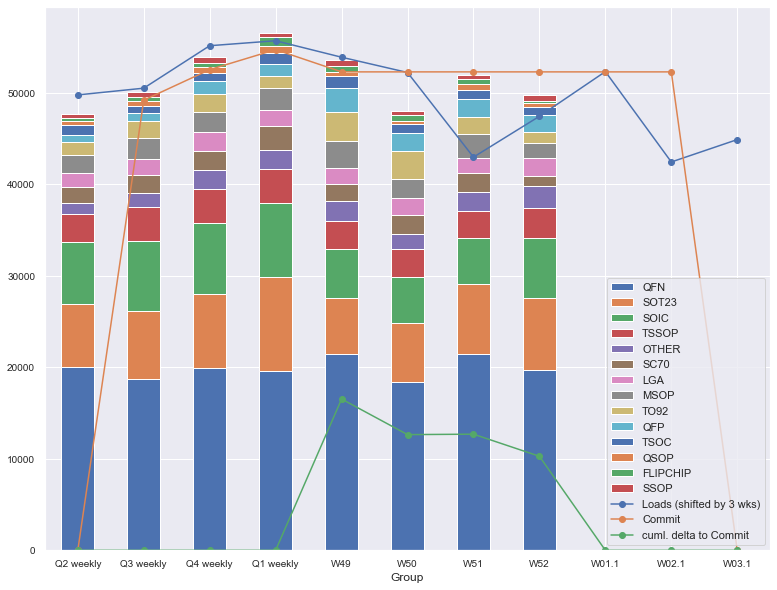

In [110]:
ovlx = ovllT2.iloc[:,0:14].plot(kind='bar',stacked='True',figsize = (13,10),fontsize=10)
ovllT2.iloc[:,[-3,-2,-1]].plot(linestyle='-', marker='o', ax = ovlx,figsize = (13,10),fontsize=10)


#Dl_d.to_excel('output&strt_tracker_QFN_Nw_file.xlsx')




# STARTS SUMMARY

In [114]:
wb1= load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
startsum = pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='Starts Summary')
data_sts = startsum.iloc[:,1:-2] 
data_sts1 = data_sts .rename(columns =data_sts.iloc[1])
data_sts2 = data_sts1.iloc[2: , :]

#print('new_dataframe : ')

data_sts3 = data_sts2.reset_index(drop=True) 
data_sts4 = data_sts3.reset_index(drop=True).fillna('')
data_sts4


,Package Group,Package Groups,Vendor,Vendor SAP name,Commit starting W46,DB (Units),DB (Wks),Transit (Units),Transit (Wks),Not Started (Units),...,W45,W46,W47,W48,W49,W50,W51,W52,W01,W02
0,ALL,ALL,Total,,52282.313988,14743.64,0.282001,31440.188,0.601354,16987.606,...,59989.224,55162.986,47763.929,58476.602,54717.149,47711.545,53505.677,49041.764,53431.706,37291.970
1,QFN,QFN,ATC,AMKR_SH_CN,100.000000,0,0.000000,0,0.000000,0.000,...,0.000,0.000,15.999,0.000,0.000,0.000,0.000,5.333,0.000,0.000
2,,QFN,ATP,AMKR_ML_PH,380.000000,0,0.000000,453.684,1.193905,0.000,...,764.094,707.022,678.388,172.942,490.893,68.088,506.586,500.032,287.561,204.931
3,,QFN,ASECL,ASE_CL_TW,13114.718681,3174.69,0.242071,6349.556,0.484155,2165.169,...,17879.082,15670.604,9916.640,14602.572,12333.534,9914.117,15703.212,10052.729,16326.473,9636.549
4,,QFN,JCET,JCET_JY_CN,147.337055,124.815,0.847139,258.633,1.755383,112.655,...,310.710,393.328,9.586,359.897,172.528,0.000,416.266,104.393,163.172,17.013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,,OTHER,JCET,JCET_JY_CN,450.666940,443.24,0.983520,769.003,1.706367,361.652,...,321.211,1114.006,939.621,323.558,47.984,1229.446,49.851,1627.158,1059.662,219.217
65,,OTHER,Others,Others,784.996758,203.435,0.259154,2458.422,3.131761,120.472,...,381.591,177.078,292.577,590.784,722.288,645.738,634.153,504.192,379.332,209.409
66,,OTHER,UTL,UTAC_C2_TH,35.358022,0,0.000000,55.82,1.578708,158.154,...,28.812,24.500,0.000,0.000,28.812,22.683,22.350,0.000,0.000,1.000
67,,OTHER,UDG,UTAC_DG_CN,0.000000,0,0.000000,0,0.000000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [115]:
wb1= load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
#print(wb)
start14= pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='Starts data')
#print(sheet_1)
stss_1 = start14.iloc[:,[0,1]]
ststs_2 = stss_1.reset_index(drop=True) 
stss_3 = ststs_2.rename(columns =ststs_2.iloc[2]).fillna(0) 
strs_4= stss_3.iloc[4: , :].reset_index(drop=True)  
strs_2 = start14.iloc[:,[-1]] #.astype(int)
strs_3 = strs_2.reset_index(drop=True) 
strs_5 = strs_3.rename(columns =strs_3.iloc[3]) 
stss_6= strs_5.iloc[6: , :].fillna(0)/1000 
stss_7 = stss_6.reset_index(drop=True)

stss8=pd.concat([strs_4,stss_7],axis=1)
stsso_9= stss8.rename(columns = {'PKG GRP':'Package Groups','VENDOR':'Vendor SAP name','2022_W52':'W02'})

In [116]:
starts_su=pd.merge(data_sts4.iloc[1:],stsso_9,on=['Package Groups','Vendor SAP name'])
starts_su

,Package Group,Package Groups,Vendor,Vendor SAP name,Commit starting W46,DB (Units),DB (Wks),Transit (Units),Transit (Wks),Not Started (Units),...,W46,W47,W48,W49,W50,W51,W52,W01,W02,NaN
0,QFN,QFN,ATC,AMKR_SH_CN,100.000000,0,0.000000,0,0.000000,0.000,...,0.000,15.999,0.000,0.000,0.000,0.000,5.333,0.000,0.000,17.013
1,,QFN,ATP,AMKR_ML_PH,380.000000,0,0.000000,453.684,1.193905,0.000,...,707.022,678.388,172.942,490.893,68.088,506.586,500.032,287.561,204.931,9636.549
2,,QFN,ASECL,ASE_CL_TW,13114.718681,3174.69,0.242071,6349.556,0.484155,2165.169,...,15670.604,9916.640,14602.572,12333.534,9914.117,15703.212,10052.729,16326.473,9636.549,6042.600
3,,QFN,JCET,JCET_JY_CN,147.337055,124.815,0.847139,258.633,1.755383,112.655,...,393.328,9.586,359.897,172.528,0.000,416.266,104.393,163.172,17.013,143.636
4,,QFN,UTL,UTAC_C2_TH,6890.000000,2940.713,0.426809,3829.951,0.555871,3918.316,...,5535.342,7711.804,6108.590,5948.125,7068.145,6496.531,7532.260,5606.901,6042.600,22.789
5,,QFN,UDG,UTAC_DG_CN,855.470440,5.613,0.006561,231.174,0.270230,0.000,...,923.893,1156.839,1769.265,1234.023,172.197,305.854,386.304,700.084,143.636,641.549
6,QFP,QFP,ATP,AMKR_ML_PH,23.782110,6.347,0.266881,8.896,0.374063,2.719,...,1.277,23.194,59.501,26.027,58.937,55.087,5.962,0.863,22.789,454.280
7,,QFP,ASECL,ASE_CL_TW,603.265348,7.253,0.012023,86.805,0.143892,27.723,...,769.161,921.165,879.454,537.179,978.798,259.164,428.906,1007.698,641.549,494.705
8,,QFP,ASEK,ASE_KA_TW,662.631231,144.384,0.217895,194.689,0.293812,206.222,...,561.085,255.211,1498.199,1013.038,792.621,664.173,566.832,1008.046,454.280,44.406
9,,QFP,UTL,UTAC_C2_TH,300.000000,327.661,1.092203,249.591,0.831970,96.540,...,360.230,265.433,243.429,198.119,367.551,76.679,148.860,170.100,494.705,28.322


In [117]:
WeekQ4= 15
n=WeekQ4*starts_su['Commit starting W46'].round(0)
display(n)

starts_su['Cumulative Output vs Commit (starting W01)'] =starts_su.iloc[:,35:-2].sum(axis=1).round(0)-n


0       1500.0
1       5700.0
2     196725.0
3       2205.0
4     103350.0
5      12825.0
6        360.0
7       9045.0
8       9945.0
9       4500.0
10     27855.0
11     11085.0
12      1575.0
13     24210.0
14     26430.0
15     15570.0
16      3765.0
17      2850.0
18     28185.0
19      9795.0
20     25485.0
21     15000.0
22      6090.0
23     79635.0
24      5985.0
25     18750.0
26      2985.0
27      8100.0
28       660.0
29      1410.0
30      4335.0
31     18465.0
32     11760.0
33      3255.0
34       690.0
35      4575.0
36      1500.0
37     22050.0
38     11205.0
39      3345.0
40      1620.0
41      1320.0
42       330.0
43         0.0
44     12135.0
45      1545.0
46        75.0
47      3900.0
48      1515.0
49      6765.0
50     11775.0
51       525.0
52         0.0
Name: Commit starting W46, dtype: float64

In [118]:
starts_su['Last Week starts vs Commit.']=starts_su['Commit starting W46']-starts_su.iloc[:,-2]
display(starts_su)


,Package Group,Package Groups,Vendor,Vendor SAP name,Commit starting W46,DB (Units),DB (Wks),Transit (Units),Transit (Wks),Not Started (Units),...,W48,W49,W50,W51,W52,W01,W02,NaN,Cumulative Output vs Commit (starting W01),Last Week starts vs Commit.
0,QFN,QFN,ATC,AMKR_SH_CN,100.000000,0,0.000000,0,0.000000,0.000,...,0.000,0.000,0.000,0.000,5.333,0.000,0.000,17.013,-812.0,82.987000
1,,QFN,ATP,AMKR_ML_PH,380.000000,0,0.000000,453.684,1.193905,0.000,...,172.942,490.893,68.088,506.586,500.032,287.561,204.931,9636.549,12231.0,-9256.549000
2,,QFN,ASECL,ASE_CL_TW,13114.718681,3174.69,0.242071,6349.556,0.484155,2165.169,...,14602.572,12333.534,9914.117,15703.212,10052.729,16326.473,9636.549,6042.600,461517.0,7072.118681
3,,QFN,JCET,JCET_JY_CN,147.337055,124.815,0.847139,258.633,1.755383,112.655,...,359.897,172.528,0.000,416.266,104.393,163.172,17.013,143.636,20509.0,3.701055
4,,QFN,UTL,UTAC_C2_TH,6890.000000,2940.713,0.426809,3829.951,0.555871,3918.316,...,6108.590,5948.125,7068.145,6496.531,7532.260,5606.901,6042.600,22.789,225806.0,6867.211000
5,,QFN,UDG,UTAC_DG_CN,855.470440,5.613,0.006561,231.174,0.270230,0.000,...,1769.265,1234.023,172.197,305.854,386.304,700.084,143.636,641.549,47358.0,213.921440
6,QFP,QFP,ATP,AMKR_ML_PH,23.782110,6.347,0.266881,8.896,0.374063,2.719,...,59.501,26.027,58.937,55.087,5.962,0.863,22.789,454.280,1987.0,-430.497890
7,,QFP,ASECL,ASE_CL_TW,603.265348,7.253,0.012023,86.805,0.143892,27.723,...,879.454,537.179,978.798,259.164,428.906,1007.698,641.549,494.705,12042.0,108.560348
8,,QFP,ASEK,ASE_KA_TW,662.631231,144.384,0.217895,194.689,0.293812,206.222,...,1498.199,1013.038,792.621,664.173,566.832,1008.046,454.280,44.406,26870.0,618.225231
9,,QFP,UTL,UTAC_C2_TH,300.000000,327.661,1.092203,249.591,0.831970,96.540,...,243.429,198.119,367.551,76.679,148.860,170.100,494.705,28.322,8365.0,271.678000


# OUTPUT SUMMARY

In [119]:
wb1= load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
outputsum = pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='Output Summary')
data_ots = outputsum.iloc[:,1:-2] 
data_ots1 = data_ots .rename(columns =data_ots.iloc[1]) 
data_ots2 = data_ots1.iloc[2: , :]

#print('new_dataframe : ')

data_ots3 = data_ots2.reset_index(drop=True) 
data_ots4 = data_ots3.reset_index(drop=True).fillna('')
data_ots4


,Package Group,Package Groups,Vendor,Vendor SAP name,Commit starting W46,DB (Units),DB (Wks),Transit (Units),Transit (Wks),Not Started (Units),...,W43,W44,W45,W46,W47,W48,W49,W50,W51,W52
0,ALL,ALL,Total,,52282.313988,14765.778,0.282424,31424.048,0.601045,16987.606,...,53494.823,65153.731,57277.509,49838.697,58046.272,58779.634,53620.846,48394.187,52329.887,49868.827
1,QFN,QFN,ATC,AMKR_SH_CN,100.000000,0.000,0.000000,0.000,0.000000,0.000,...,0.000,0.000,0.000,0.000,15.995,0.000,0.000,0.000,5.323,0.000
2,,QFN,ATP,AMKR_ML_PH,380.000000,0.000,0.000000,453.684,1.193905,0.000,...,533.982,1053.872,805.640,704.446,213.003,334.815,224.618,476.794,416.327,322.170
3,,QFN,ASECL,ASE_CL_TW,13114.718681,3174.690,0.242071,6349.556,0.484155,2165.169,...,12387.716,16716.683,19096.936,13936.556,12350.475,14050.147,12777.892,10747.391,12997.145,12106.088
4,,QFN,JCET,JCET_JY_CN,147.337055,124.815,0.847139,258.633,1.755383,112.655,...,362.984,0.000,378.560,90.375,243.813,359.558,0.000,0.000,520.275,172.504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,,OTHER,JCET,JCET_JY_CN,450.666940,443.240,0.983520,769.003,1.706367,361.652,...,4.918,173.191,684.680,54.169,473.678,602.722,459.553,313.559,371.572,1111.493
65,,OTHER,Others,Others,784.996758,203.435,0.259154,2458.422,3.131761,120.472,...,909.227,717.747,588.286,654.571,257.907,437.681,453.993,277.954,344.611,583.141
66,,OTHER,UTL,UTAC_C2_TH,35.358022,0.000,0.000000,55.820,1.578708,158.154,...,0.000,0.000,0.000,27.198,4.000,4.000,9.659,13.571,24.334,4.968
67,,OTHER,UDG,UTAC_DG_CN,0.000000,0.000,0.000000,0.000,0.000000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [120]:
wb1= load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
#print(wb)
output15= pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='Output data')
#print(sheet_1)
stos_1 = output15.iloc[:,[0,1]] 
#stots_2 = stos_1.reset_index(drop=True) 
stos_3 = stos_1.rename(columns =stos_1.iloc[3]).fillna(0) 
stors_4= stos_3.iloc[6: , :].reset_index(drop=True) 
stors_2 = output15.iloc[:,[-1]] #.astype(int)
stos_3 = stors_2.reset_index(drop=True) 
stoos_5 = stos_3.rename(columns =stos_3.iloc[3]) 
stsos_6= stoos_5.iloc[6: , :].fillna(0)/1000 
stsos_7 = stsos_6.reset_index(drop=True)
#st=strs_2.div(1000)
stsos8=pd.concat([stors_4,stsos_7],axis=1)
stsso_9= stsos8.rename(columns = {'PKG Group - for tracker':'Package Groups','ASSY_FCLTY (group)':'Vendor SAP name','2022_W52':'W52'})#.sort_values('Package Group')
stsso_9

,Package Groups,Vendor SAP name,W52
0,FLIPCHIP,ASE_KA_TW,289.993
1,FLIPCHIP,AMKR_SH_CN,0.000
2,LGA,UTAC_C2_TH,1920.210
3,LGA,ASE_CL_TW,13.302
4,MSOP,UTAC_C2_TH,1293.971
5,MSOP,GRTK_ML_TW,346.172
6,OTHER,ASE_CL_TW,451.598
7,OTHER,JCET_JY_CN,1111.493
8,OTHER,Others,583.141
9,OTHER,ASE_KA_TW,105.824


In [121]:


output_su=pd.merge(data_ots4.iloc[1:],stsso_9,on=['Package Groups','Vendor SAP name']).round(0) 
output_su

output_su


,Package Group,Package Groups,Vendor,Vendor SAP name,Commit starting W46,DB (Units),DB (Wks),Transit (Units),Transit (Wks),Not Started (Units),...,W44,W45,W46,W47,W48,W49,W50,W51,W52_x,W52_y
0,QFN,QFN,ATC,AMKR_SH_CN,100.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,16.0,0.0,0.0,0.0,5.0,0.0,0.0
1,,QFN,ATP,AMKR_ML_PH,380.0,0.0,0.0,454.0,1.0,0.0,...,1054.0,806.0,704.0,213.0,335.0,225.0,477.0,416.0,322.0,322.0
2,,QFN,ASECL,ASE_CL_TW,13115.0,3175.0,0.0,6350.0,0.0,2165.0,...,16717.0,19097.0,13937.0,12350.0,14050.0,12778.0,10747.0,12997.0,12106.0,12106.0
3,,QFN,JCET,JCET_JY_CN,147.0,125.0,1.0,259.0,2.0,113.0,...,0.0,379.0,90.0,244.0,360.0,0.0,0.0,520.0,173.0,173.0
4,,QFN,UTL,UTAC_C2_TH,6890.0,2941.0,0.0,3830.0,1.0,3918.0,...,7158.0,6791.0,6998.0,7080.0,7928.0,8185.0,6711.0,7198.0,6169.0,6169.0
5,,QFN,UDG,UTAC_DG_CN,855.0,6.0,0.0,231.0,0.0,0.0,...,1395.0,453.0,837.0,2150.0,1383.0,303.0,463.0,342.0,888.0,888.0
6,QFP,QFP,ATP,AMKR_ML_PH,24.0,6.0,0.0,9.0,0.0,3.0,...,0.0,1.0,8.0,80.0,20.0,27.0,33.0,24.0,31.0,31.0
7,,QFP,ASECL,ASE_CL_TW,603.0,7.0,0.0,87.0,0.0,28.0,...,936.0,785.0,1014.0,595.0,777.0,1041.0,127.0,576.0,824.0,824.0
8,,QFP,ASEK,ASE_KA_TW,663.0,144.0,0.0,195.0,0.0,206.0,...,898.0,827.0,569.0,959.0,477.0,1266.0,1786.0,1146.0,972.0,972.0
9,,QFP,UTL,UTAC_C2_TH,300.0,328.0,1.0,250.0,1.0,97.0,...,379.0,430.0,388.0,287.0,315.0,324.0,71.0,148.0,72.0,72.0


In [122]:
WeekQ4= 13
O=WeekQ4*output_su['Commit starting W46'].round(0)
display(O)

output_su['Cumulative Output vs Commit (starting W01)'] =output_su.iloc[:,35:-2].sum(axis=1).round(0)-O


0       1300.0
1       4940.0
2     170495.0
3       1911.0
4      89570.0
5      11115.0
6        312.0
7       7839.0
8       8619.0
9       3900.0
10     24141.0
11      9607.0
12      1365.0
13     20982.0
14     22906.0
15     13494.0
16      3263.0
17      2470.0
18     24427.0
19      8489.0
20     22087.0
21     13000.0
22      5278.0
23     69017.0
24      5187.0
25     16250.0
26      2587.0
27      7020.0
28       572.0
29      1222.0
30      3757.0
31     16003.0
32     10192.0
33      2821.0
34       598.0
35      3965.0
36      1300.0
37     19110.0
38      9711.0
39      2899.0
40      1404.0
41      1144.0
42       286.0
43         0.0
44     10517.0
45      1339.0
46        65.0
47      3380.0
48      1313.0
49      5863.0
50     10205.0
51       455.0
52         0.0
Name: Commit starting W46, dtype: float64

In [123]:
output_su['Last Week starts vs Commit.']=output_su['Commit starting W46']-output_su.iloc[:,-2].round(0)
display(output_su)


,Package Group,Package Groups,Vendor,Vendor SAP name,Commit starting W46,DB (Units),DB (Wks),Transit (Units),Transit (Wks),Not Started (Units),...,W46,W47,W48,W49,W50,W51,W52_x,W52_y,Cumulative Output vs Commit (starting W01),Last Week starts vs Commit.
0,QFN,QFN,ATC,AMKR_SH_CN,100.0,0.0,0.0,0.0,0.0,0.0,...,0.0,16.0,0.0,0.0,0.0,5.0,0.0,0.0,-613.0,100.0
1,,QFN,ATP,AMKR_ML_PH,380.0,0.0,0.0,454.0,1.0,0.0,...,704.0,213.0,335.0,225.0,477.0,416.0,322.0,322.0,13065.0,58.0
2,,QFN,ASECL,ASE_CL_TW,13115.0,3175.0,0.0,6350.0,0.0,2165.0,...,13937.0,12350.0,14050.0,12778.0,10747.0,12997.0,12106.0,12106.0,468095.0,1009.0
3,,QFN,JCET,JCET_JY_CN,147.0,125.0,1.0,259.0,2.0,113.0,...,90.0,244.0,360.0,0.0,0.0,520.0,173.0,173.0,21214.0,-26.0
4,,QFN,UTL,UTAC_C2_TH,6890.0,2941.0,0.0,3830.0,1.0,3918.0,...,6998.0,7080.0,7928.0,8185.0,6711.0,7198.0,6169.0,6169.0,229227.0,721.0
5,,QFN,UDG,UTAC_DG_CN,855.0,6.0,0.0,231.0,0.0,0.0,...,837.0,2150.0,1383.0,303.0,463.0,342.0,888.0,888.0,45974.0,-33.0
6,QFP,QFP,ATP,AMKR_ML_PH,24.0,6.0,0.0,9.0,0.0,3.0,...,8.0,80.0,20.0,27.0,33.0,24.0,31.0,31.0,1927.0,-7.0
7,,QFP,ASECL,ASE_CL_TW,603.0,7.0,0.0,87.0,0.0,28.0,...,1014.0,595.0,777.0,1041.0,127.0,576.0,824.0,824.0,12631.0,-221.0
8,,QFP,ASEK,ASE_KA_TW,663.0,144.0,0.0,195.0,0.0,206.0,...,569.0,959.0,477.0,1266.0,1786.0,1146.0,972.0,972.0,27473.0,-309.0
9,,QFP,UTL,UTAC_C2_TH,300.0,328.0,1.0,250.0,1.0,97.0,...,388.0,287.0,315.0,324.0,71.0,148.0,72.0,72.0,9296.0,228.0


# VENDOR TRACKER

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
#import seaborn as sns
#import patchworklib as pw
import seaborn as sns 
import numpy as np  
sns.set()


In [125]:
#### convert excel to dataframe ### step 1
wb1= load_workbook(filename= "L-Maxim Output & Starts Tracker 2023_W04.xlsx")
vendr = pd.read_excel('L-Maxim Output & Starts Tracker 2023_W04.xlsx', sheet_name ='Vendor Tracker')
data4 = vendr.iloc[:,0:2] ###############     step 1 qfn 
data5= (vendr.iloc[:,2:6]).round(0).fillna('0').astype(int)
data6=vendr.iloc[:,-8:].round(0).fillna('0').astype(int) 
Vendr_Trkr = pd.concat([data4,data5,data6],axis=1)

Vendr_Trkr


,Vendor,SAP Vendor,Q2 weekly,Q3 weekly,Q4 weekly,Q1 weekly,W52,W01.1,W02.1,W03.1,W04.1,W05.1,W06.1,W07.1
0,UTL,UTAC_C2_TH,20075,18847,20195,22955,20316,16452,21036,15173,20070,0,0,0
1,ASECL,ASE_CL_TW,11190,11817,14503,13541,13395,14360,12025,12091,15142,0,0,0
2,GREATEK,GRTK_ML_TW,3246,4168,4283,4924,4822,3005,2946,3241,4579,0,0,0
3,ATP,AMKR_ML_PH,3097,4114,4651,4988,3511,2518,2531,3381,4764,0,0,0
4,CIRTEK,CIRT_BN_PH,2717,2771,3002,2601,1878,630,1506,1116,1952,0,0,0
5,CARSEM-M,CARS_IM_MY,3080,3273,2877,3165,1788,1879,2049,1946,1700,0,0,0
6,UDG,UTAC_DG_CN,1990,2783,2012,1484,888,143,77,501,385,0,0,0
7,ASEK,ASE_KA_TW,760,987,1086,1188,1368,1394,1113,1543,469,0,0,0
8,JCET,JCET_JY_CN,1052,795,907,755,1284,620,852,1077,852,0,0,0
9,ATC,AMKR_SH_CN,301,309,202,504,35,48,75,314,159,0,0,0


In [126]:
### to get the sum of all package type as per W43 2022 ### Step 2 ##
wb1 = load_workbook(filename= "L-Maxim Output & Starts Tracker 2023_W04.xlsx")
#print(wb)
output16 = pd.read_excel('L-Maxim Output & Starts Tracker 2023_W04.xlsx', sheet_name ='Output data')
#sheet = wb['Output data']
dataframe2 = output16.iloc[:,[1, -1]] 

dataframe_3= dataframe2.iloc[3:]
dataframe_4 = dataframe_3.rename(columns =dataframe_3.iloc[0]) 
dataframe_5a = dataframe_4.reset_index(drop=True)  
dataframe_6 = dataframe_5a.iloc[1: , :] 
dataframe_6.columns = ['Vendor', 'W04.1']

display(dataframe_6)


,Vendor,W04.1
1,ASE_CL_TW,NaN
2,ASE_KA_TW,NaN
3,AMKR_SH_CN,159254
4,ASE_KA_TW,245401
5,UTAC_C2_TH,386440
6,ASE_CL_TW,171577
7,GRTK_ML_TW,424517
8,UTAC_C2_TH,1169112
9,AMKR_SH_CN,NaN
10,CARS_IM_MY,NaN


In [127]:
cos3= dataframe_6.groupby('Vendor').agg({'W04.1':'sum'})/1000  ##step 2(b)###
#print(df_2)

display(cos3)


,W04.1
Vendor,
AMKR_ML_PH,4764.223
AMKR_SH_CN,159.254
ASE_CL_TW,15141.748
ASE_KA_TW,468.586
CARS_IM_MY,1700.265
CIRT_BN_PH,1951.965
GRTK_ML_TW,4578.946
JCET_JY_CN,852.359
Others,505.872


In [128]:
##############Vendor traker starts##################3
wb1= load_workbook(filename= "L-Maxim Output & Starts Tracker 2023_W04.xlsx")
#print(wb)
vnstarts= pd.read_excel('L-Maxim Output & Starts Tracker 2023_W04.xlsx', sheet_name ='Starts data')
#print(sheet_1)
sheet_2= vnstarts.iloc[:,[1, -1]] 
n = 2
sheet_3= sheet_2.iloc[n:]
#display(df8a)
sheet_4= sheet_3.rename(columns =sheet_3.iloc[0]) 
#print('new_dataframe : ')

sheet_5 = sheet_4.reset_index(drop=True) 

df8a= sheet_5.iloc[1: , :] 

#type(sheet_1)
df8a


starts= df8a['2023_W04'].sum()/1000 

display( starts)


44041.121

In [129]:
####### Vendor loads ###################
wb1= load_workbook(filename= "L-Maxim Output & Starts Tracker 2023_W04.xlsx")
#print(wb)
vnloads= pd.read_excel('L-Maxim Output & Starts Tracker 2023_W04.xlsx', sheet_name ='Loads data')
#print(sheet_1)
sheet2_= vnloads.iloc[:,[1, -1]]
n = 3
sheet3_= sheet2_.iloc[n:]  

sheet4_= sheet3_.rename(columns =sheet3_.iloc[0]) 
print('new_dataframe : ')

sheet5_ = sheet4_.reset_index(drop=True)  
sheet6_= sheet5_.reset_index(drop=True)
#n = 2
#sheet6a_= sheet6_.iloc[n:]
s46= sheet6_.rename(columns =sheet6_.iloc[0])
sheet9_= s46.iloc[1: , :] 

display(sheet9_)

loads= sheet9_['2023_W04'].sum()/1000 

display(loads)

new_dataframe : 


,VENDOR,2023_W04
1,ASE_CL_TW,NaN
2,AMKR_SH_CN,244697
3,ASE_KA_TW,635522
4,ASE_CL_TW,276412
5,UTAC_C2_TH,421853
6,GRTK_ML_TW,808713
7,UTAC_C2_TH,2029398
8,AMKR_ML_PH,15089
9,AMKR_SH_CN,NaN
10,ASE_CL_TW,934026


47123.88

In [130]:
[Vendr_Trkr.insert(i, '', np.nan, allow_duplicates=True) for i in range(Vendr_Trkr.shape[1],15 ,-1,)]
[Vendr_Trkr.insert(i, '', np.nan, allow_duplicates=True) for i in range(Vendr_Trkr.shape[1],16 ,-2,)]



[]

In [131]:
Vendr_Trkr.iloc[-4, Vendr_Trkr.columns.get_loc('W07.1')] =starts ## -3 mean row to add value for example starts
Vendr_Trkr.iloc[-3, Vendr_Trkr.columns.get_loc('W07.1')] =loads
Vendr_Trkr

,Vendor,SAP Vendor,Q2 weekly,Q3 weekly,Q4 weekly,Q1 weekly,W52,W01.1,W02.1,W03.1,W04.1,W05.1,W06.1,W07.1
0,UTL,UTAC_C2_TH,20075,18847,20195,22955,20316,16452,21036,15173,20070,0,0,0.000
1,ASECL,ASE_CL_TW,11190,11817,14503,13541,13395,14360,12025,12091,15142,0,0,0.000
2,GREATEK,GRTK_ML_TW,3246,4168,4283,4924,4822,3005,2946,3241,4579,0,0,0.000
3,ATP,AMKR_ML_PH,3097,4114,4651,4988,3511,2518,2531,3381,4764,0,0,0.000
4,CIRTEK,CIRT_BN_PH,2717,2771,3002,2601,1878,630,1506,1116,1952,0,0,0.000
5,CARSEM-M,CARS_IM_MY,3080,3273,2877,3165,1788,1879,2049,1946,1700,0,0,0.000
6,UDG,UTAC_DG_CN,1990,2783,2012,1484,888,143,77,501,385,0,0,0.000
7,ASEK,ASE_KA_TW,760,987,1086,1188,1368,1394,1113,1543,469,0,0,0.000
8,JCET,JCET_JY_CN,1052,795,907,755,1284,620,852,1077,852,0,0,0.000
9,ATC,AMKR_SH_CN,301,309,202,504,35,48,75,314,159,0,0,0.000


# PACKAGE SUMMARY

In [132]:
#### convert excel to dataframe ### step 1
wb1= load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")


### to get the sum of all package type as per W43 2022 ### Step 2 ##
wb1 = load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
#print(wb)
outputpk = pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='Output data')
#sheet = wb['Output data']
outputpk1 = outputpk.iloc[:,[0,-1]] 
outputpk2=outputpk1.iloc[3:] 
outputpk3 = outputpk2.reset_index(drop=True) 
outputpk4 = outputpk3.rename(columns =outputpk3.iloc[0]) 
outputpk5 = outputpk4.iloc[1: , :] 


display(outputpk5)


,PKG Group - for tracker,2022_W52
1,CSP,NaN
2,CSP,NaN
3,FLIPCHIP,289993
4,FLIPCHIP,NaN
5,LGA,1920210
6,LGA,13302
7,MSOP,1293971
8,MSOP,346172
9,OTHER,451598
10,OTHER,1111493


In [133]:
####Step 2(a) ####
pkg_sum= outputpk5.rename(columns = {'PKG Group - for tracker':'PACKAGE_GROUP','2022_W52':'Sum of W52'}).fillna(0) 


In [134]:
pkg_sum1 = pkg_sum.groupby('PACKAGE_GROUP').agg({'Sum of W52':'sum'})/1000##step 2(b)###
pkg_sum2=round(pkg_sum1)

In [135]:
pkg_sum3=pkg_sum2.sort_values(by=['Sum of W52'], ascending=True)

In [136]:
Output1=pkg_sum3.drop('CSP')
Output1


,Sum of W52
PACKAGE_GROUP,
TSOT,123.0
FLIPCHIP,290.0
QSOP,364.0
SSOP,614.0
TSOC,883.0
SC70,1099.0
TO92,1233.0
MSOP,1640.0
QFP,1900.0


In [137]:
############ FOR week 40 ############
wb1 = load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
#print(wb)
outputsumy = pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='Output Summary')
#sheet = wb['Output data']
abc1= outputsumy.iloc[:,[2,5]] 
abc2= abc1.drop([0]) 

abc3 = abc2.rename(columns =abc2.iloc[0]) 
abc4= abc3.iloc[2: , :]


#display(abc4)

abc5 = abc4.rename(columns = {'Package Groups':'PACKAGE_GROUP'})
display(abc5)


,PACKAGE_GROUP,Commit starting W46
3,QFN,100
4,QFN,380
5,QFN,13114.718681
6,QFN,147.337055
7,QFN,6890
...,...,...
66,OTHER,450.66694
67,OTHER,784.996758
68,OTHER,35.358022
69,OTHER,0


In [138]:
display(abc1)

,Unnamed: 2,Unnamed: 5
0,NaN,Target
1,Package Groups,Commit starting W46
2,ALL,52282.313988
3,QFN,100
4,QFN,380
...,...,...
66,OTHER,450.66694
67,OTHER,784.996758
68,OTHER,35.358022
69,OTHER,0


In [139]:
WK46= abc5.groupby('PACKAGE_GROUP').agg({'Commit starting W46':'sum'})##step 2(b)###
Wk_46=round(WK46)
Week46=Wk_46.sort_values(by=['Commit starting W46'], ascending=True)#
Week46.reset_index(inplace=True)




In [140]:
### to get the sum of all package type as per W43 2022 ### Step 2 ##
wb1 = load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
#print(wb)
strtp = pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='Starts data')
#sheet = wb['Output data']
strtp1= strtp.iloc[:,[0,-1]] 
strtp2= strtp1.iloc[2:] 
#n=-1
#df4=df3.iloc[:,n]
strtp3= strtp2.reset_index(drop=True) 
strtp4= strtp3.rename(columns =strtp3.iloc[0]) 
strtp5= strtp4.iloc[1: , :] 


strtp6 = strtp5.rename(columns = {'PKG GRP':'PACKAGE_GROUP','2022_W52':'Sum of W52'}).fillna(0)
#display(cos2)

strtp7= strtp6.groupby('PACKAGE_GROUP').agg({'Sum of W52':'sum'})/1000 ##step 2(b)###
Strt8=round(strtp7)

DF_Starts=Strt8.sort_values(by=['Sum of W52'], ascending=False)

DF_Starts1=DF_Starts.drop('CSP')

display(DF_Starts1)

,Sum of W52
PACKAGE_GROUP,
QFN,16045.0
SOT23,5352.0
SOIC,4897.0
TSSOP,3446.0
OTHER,1745.0
QFP,1613.0
MSOP,1122.0
SC70,602.0
FLIPCHIP,478.0


In [141]:
data_1 = pd.merge(Output1, DF_Starts1,on='PACKAGE_GROUP',how = 'left')### final excel sheet 1

#display(data_1)


In [142]:
data_1.reset_index(inplace=True)

dh1=data_1.drop(['PACKAGE_GROUP'],axis = 1)

#display(dh1)

In [143]:
outputW52 = dh1[['Sum of W52_x']] #### for output data of w43

startsW52 = dh1[['Sum of W52_y']] #####for starts data of w43

OUTPUT_1=pd.concat([Week46,outputW52],axis=1) ###$$$ first datframe ###$$$

#print(OUTPUT_1)


In [144]:
STARTS_1=pd.concat([Week46,startsW52],axis=1) ###$$$ first datframe ###$$$

#display(STARTS_1)

PKG_su = [OUTPUT_1,STARTS_1]

In [145]:
PKG_su

[   PACKAGE_GROUP Commit starting W46  Sum of W52_x
 0           TSOT          390.770107         123.0
 1           QSOP          853.531637         290.0
 2           SSOP         1335.968233         364.0
 3       FLIPCHIP         1477.534891         614.0
 4           TSOC         1941.233374         883.0
 5           TO92         2940.979966        1099.0
 6            QFP         3179.357377        1233.0
 7            LGA         3297.122418        1640.0
 8           SC70         4030.241451        1900.0
 9           MSOP          4703.06949        1934.0
 10         OTHER         5140.380385        2436.0
 11         TSSOP         6715.103066        3278.0
 12          SOIC        12155.214044        6467.0
 13         SOT23        13429.069187        7951.0
 14           QFN        42975.052352       19658.0,
    PACKAGE_GROUP Commit starting W46  Sum of W52_y
 0           TSOT          390.770107          67.0
 1           QSOP          853.531637         478.0
 2         

# VENDOR SUMMARY

In [146]:
#### convert excel to dataframe ### step 1
wb1= load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W43.xlsx")


### to get the sum of all package type as per W43 2022 ### Step 2 ##
wb1 = load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
#print(wb)
output18 = pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='Output data')
#sheet = wb['Output data']
vendrs = output18.iloc[:,[1,-1]] 
vendrs1= vendrs.iloc[3:]
vendrs3 = vendrs1.reset_index(drop=True) 
vendrs4= vendrs3.rename(columns =vendrs3.iloc[0]) 
vendrs5 = vendrs4.iloc[1: , :] 


display(vendrs5)


,ASSY_FCLTY (group),2022_W52
1,ASE_KA_TW,NaN
2,ASE_CL_TW,NaN
3,ASE_KA_TW,289993
4,AMKR_SH_CN,NaN
5,UTAC_C2_TH,1920210
6,ASE_CL_TW,13302
7,UTAC_C2_TH,1293971
8,GRTK_ML_TW,346172
9,ASE_CL_TW,451598
10,JCET_JY_CN,1111493


In [147]:
####Step 2(a) ####
vn_sum= vendrs5.rename(columns = {'ASSY_FCLTY (group)':'VENDOR','2022_W52':'Sum of W52'}).fillna(0) 
vn_sum

,VENDOR,Sum of W52
1,ASE_KA_TW,0
2,ASE_CL_TW,0
3,ASE_KA_TW,289993
4,AMKR_SH_CN,0
5,UTAC_C2_TH,1920210
6,ASE_CL_TW,13302
7,UTAC_C2_TH,1293971
8,GRTK_ML_TW,346172
9,ASE_CL_TW,451598
10,JCET_JY_CN,1111493


In [148]:
vn_sum1 = vn_sum.groupby('VENDOR').agg({'Sum of W52':'sum'})/1000##step 2(b)###
vn_sum2=round(vn_sum1)

In [149]:
vn_output=vn_sum2.sort_values(by=['Sum of W52'], ascending=True)
vn_output

,Sum of W52
VENDOR,
AMKR_SH_CN,35.0
Others,583.0
UTAC_DG_CN,888.0
JCET_JY_CN,1284.0
ASE_KA_TW,1368.0
CARS_IM_MY,1788.0
CIRT_BN_PH,1878.0
AMKR_ML_PH,3511.0
GRTK_ML_TW,4822.0


In [150]:
############ FOR week 40 ############
wb1 = load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
#print(wb)
im= pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='Output Summary')
#sheet = wb['Output data']
im1= im.iloc[:,[3,5]]
im2= im1.drop([0]) .

im3 = im2.rename(columns =im2.iloc[0]) 
im4= im3.iloc[2: , :]
#abc5= abc4.reset_index(drop=True) 

im4


,Vendor,Commit starting W46
3,ATC,100
4,ATP,380
5,ASECL,13114.718681
6,JCET,147.337055
7,UTL,6890
...,...,...
66,JCET,450.66694
67,Others,784.996758
68,UTL,35.358022
69,UDG,0


In [151]:
im5 = im4.rename(columns = {'Vendor':'VENDOR'})
display(im5)

,VENDOR,Commit starting W46
3,ATC,100
4,ATP,380
5,ASECL,13114.718681
6,JCET,147.337055
7,UTL,6890
...,...,...
66,JCET,450.66694
67,Others,784.996758
68,UTL,35.358022
69,UDG,0


In [152]:
WK46v= im5.groupby('VENDOR').agg({'Commit starting W46':'sum'})##step 2(b)###
Wk_46v=round(WK46v)

In [153]:
Week46v=Wk_46v.sort_values(by=['Commit starting W46'], ascending=True)#
Week46v.reset_index(inplace=True)

In [154]:
display(Week46v) ## constant week 46 dataframe

,VENDOR,Commit starting W46
0,ATC,298.929071
1,JCET,598.003995
2,Others,784.996758
3,UDG,855.47044
4,ASEK,1305.839588
5,CIRTEK,2582.322165
6,CARSEM-M,3315.107512
7,GREATEK,3361.204724
8,ATP,3645.915196
9,ASECL,14925.661315


In [155]:
### to get the sum of all package type as per W43 2022 ### Step 2 ##
wb1 = load_workbook(filename= "L-Maxim Output & Starts Tracker 2022_W52.xlsx")
#print(wb)
ck = pd.read_excel('L-Maxim Output & Starts Tracker 2022_W52.xlsx', sheet_name ='Starts data')

ck2= ck.iloc[:,[1,-1]] 
ck3= ck2.iloc[2:]
#n=-1
#df4=df3.iloc[:,n]
ck5=ck3.reset_index(drop=True) 
ck6= ck5.rename(columns =ck5.iloc[0]) 
ck7= ck6.iloc[1: , :]

display(ck7)


,VENDOR,2022_W52
1,ASE_CL_TW,NaN
2,AMKR_SH_CN,13398
3,ASE_KA_TW,464113
4,ASE_CL_TW,413003
5,UTAC_C2_TH,NaN
6,GRTK_ML_TW,174572
7,UTAC_C2_TH,947766
8,AMKR_ML_PH,26606
9,AMKR_SH_CN,NaN
10,ASE_CL_TW,369031


In [156]:
ck8 = ck7.rename(columns = {'2022_W52':'Sum of W52'}).fillna(0)



ck9= ck8.groupby('VENDOR').agg({'Sum of W52':'sum'})/1000 ##step 2(b)###
Starts_ck8=round(ck9)

DF_Starts=Starts_ck8.sort_values(by=['Sum of W52'], ascending=False)

display(DF_Starts)## dataframe 2


,Sum of W52
VENDOR,
UTAC_C2_TH,16327.0
ASE_CL_TW,11060.0
AMKR_ML_PH,3207.0
GRTK_ML_TW,2272.0
CARS_IM_MY,1814.0
ASE_KA_TW,1031.0
CIRT_BN_PH,978.0
JCET_JY_CN,236.0
Others,209.0


In [157]:
ck_1 = pd.merge(vn_output, DF_Starts,on='VENDOR',how = 'left')### final excel sheet 1

#display(ck_1)

ck_1.reset_index(inplace=True)

dh1=ck_1.drop(['VENDOR'],axis = 1)

display(dh1)


,Sum of W52_x,Sum of W52_y
0,35.0,13.0
1,583.0,209.0
2,888.0,144.0
3,1284.0,236.0
4,1368.0,1031.0
5,1788.0,1814.0
6,1878.0,978.0
7,3511.0,3207.0
8,4822.0,2272.0
9,13395.0,11060.0


In [158]:
outputw52v = dh1[['Sum of W52_x']] #### for output data of w43

startsw52v = dh1[['Sum of W52_y']] #####for starts data of w43

V_OUTPUT1=pd.concat([Week46v,outputw52v],axis=1) ###$$$ first datframe ###$$$




V_STARTS1=pd.concat([Week46v,startsw52v],axis=1) ###$$$ first datframe ###$$$


display(V_STARTS1)

Vendr_su = [V_OUTPUT1,V_STARTS1]

,VENDOR,Commit starting W46,Sum of W52_y
0,ATC,298.929071,13.0
1,JCET,598.003995,209.0
2,Others,784.996758,144.0
3,UDG,855.47044,236.0
4,ASEK,1305.839588,1031.0
5,CIRTEK,2582.322165,1814.0
6,CARSEM-M,3315.107512,978.0
7,GREATEK,3361.204724,3207.0
8,ATP,3645.915196,2272.0
9,ASECL,14925.661315,11060.0


In [159]:
Vendr_su

[      VENDOR Commit starting W46  Sum of W52_x
 0        ATC          298.929071          35.0
 1       JCET          598.003995         583.0
 2     Others          784.996758         888.0
 3        UDG           855.47044        1284.0
 4       ASEK         1305.839588        1368.0
 5     CIRTEK         2582.322165        1788.0
 6   CARSEM-M         3315.107512        1878.0
 7    GREATEK         3361.204724        3511.0
 8        ATP         3645.915196        4822.0
 9      ASECL        14925.661315       13395.0
 10       UTL        20608.863223       20316.0
 11     Total        52282.313988           NaN,
       VENDOR Commit starting W46  Sum of W52_y
 0        ATC          298.929071          13.0
 1       JCET          598.003995         209.0
 2     Others          784.996758         144.0
 3        UDG           855.47044         236.0
 4       ASEK         1305.839588        1031.0
 5     CIRTEK         2582.322165        1814.0
 6   CARSEM-M         3315.107512      

In [180]:
with pd.ExcelWriter(base+"\\"+"AssemblyTracker_mxim.xlsx") as writer:
   
   
    output_su.to_excel(writer, sheet_name='SHEET1',index=False)
    starts_su.to_excel(writer, sheet_name='SHEET2',index=False)
    startrow=0
    for df in Vendr_su :
        df.to_excel(writer, 'SHEET3', startrow=startrow)
        startrow += (df.shape[0] + 2)
    startrow=0   
    for df in PKG_su :
        df.to_excel(writer,'SHEET4', startrow=startrow)
        startrow += (df.shape[0] + 2)
           
   
    Vendr_Trkr.to_excel(writer, sheet_name='SHEET5',index=False)
    overall_Trker.to_excel(writer, sheet_name='SHEET6',index=False)
    data_Qfn4.to_excel(writer, sheet_name='SHEET7',index=False)
    data_flipch4.to_excel(writer, sheet_name='SHEET8',index=False)
    data_lga4.to_excel(writer, sheet_name='SHEET9',index=False)
    data_sc74.to_excel(writer, sheet_name='SHEET10',index=False)
    data_qsop4.to_excel(writer, sheet_name='SHEET11',index=False)
    data_sot24.to_excel(writer, sheet_name='SHEET12',index=False)
    data_tss4.to_excel(writer, sheet_name='SHEET13',index=False)
    data_tsoc4.to_excel(writer, sheet_name='SHEET14',index=False)
    data_tsot4.to_excel(writer, sheet_name='SHEET15',index=False)
    data_tsso4.to_excel(writer, sheet_name='SHEET16',index=False)
    data_othr4.to_excel(writer, sheet_name='SHEET17',index=False)
    overall_Trker.to_excel(writer, sheet_name='SHEET18',index=False)
  